### Fase I. Business Understanding. Definició del objectiu del projecte. Quines preguntes volem respondre??

Aquesta fase inicial s'enfoca la comprensió dels objectius del projecte. Després es converteix aquest coneixement de les dades, en la definició d'un problema de Data Mining i en un pla preliminar per aconseguir els objectius establerts.

Aquest projecte neix amb l'objectiu de respondre dues preguntes que ja fa anys que em voltaven pel cap. Desde que vaig sentir a parlar per primera vegada de Big Data, Data Science i Inteligencia Artificial em vaig preguntar quines aplicacions podria tenir en el món de l'esport i concretament del bàsquet. Ja desde petit m'encantava consultar les estadístiques dels partits i extreure'n conclusions, ja fos dels partits que jugava com a jugador amateur com també dels partits d'equips professionals de l'ACB i de la NBA. Es per això que quan el Data Science va començar a aparèixer amb força em vaig preguntar si això podria respondre preguntes com per exemple si podria ajudar a predir com aniria un partit de bàsquet, quins resultats calia esperar etc.

Les dues principals preguntes que busco respondre en aquest treball són:

- Es pot arrivar a predir els resultats dels partits de la NBA i si és així amb quina precisió es pot fer?
- És possible amb aquestes previsions aconseguir beneficis econòmics apostant a partir d'aquestes prediccions?

Per tal de respondre aquestes preguntes caldrà recol·lectar una gran quantitat de dades de tot tipus relacionades amb la NBA. Com més dades de diferents aspectes siguem capaços de recol·lectar millors prediccions es podran realitzar.

La llista de dades que es voldrien aconseguir de forma inicial són les següents:

- Resultats i data de cada partit de la temporada a analitzar de la NBA.
- Estadistiques de cada jugador per cada partit disputat.
- Estadistiques avançades de cada equip de tota la temporada.
- Estadistiques avançades de cada jugador de tota la temporada.
- Desplaçaments i viatges dels equips.
- Quotes de les apostes prèvies a cada partit.
- Prediccions de victòries de cada equip a l'inici de la temporada

Cal tenir en compte que cada temporada es disputen una gran quantitat de partits. En total són 1230 partits, i cada un dels 30 equips de la lliga en disputa un total de 82. A més hi participen un total de 450/500 jugadors cada temporada, això ens donarà una gran quantitat de dades que analitzar i processar.

El pla preliminar per resoldre les dues preguntes que m'he plantejat consisteix en els següents passos:

- Recolecció de les dades i prepar-les per el pertinent anàlisis
- Crear diferents models de predicció basats en algoritmes de Machine Learning de Classificació (Logistic Regression, SVM) per tal de que poguem preveure quin dels dos equips guanyarà el partit que es vol analitzar.
- Realitzar diferents simulacions de prediccions de resultats diferents i guardar-ne els resultats.
- A partir de les simulacions fetes i de les dades de quotes d'apostes veure quin seria el retorn de les apostes

Un cop fets aquests 4 passos hauriem de ser capaços de respondre les dues preguntes principals plantejades.



### Fase II. Data Understanding. Estudi i comprensió de les dades

La fase de comprensió de les dades comença amb la recolecció inicial de dades i continua amb les activitats que permeten familiaritzar-se amb les dades, identificar els problemes de qualitat, coneixament preliminar sobre les dades, o descobrir subconjunts interessants per formular hipòtesis en cas que hi hagi informació oculta.

A continuació aplicarem a cada un dels tipus de dades que es recolectaran a continuació:

#### Data i resultats de cada partit de la temporada

En el següent enllaç es pot obtenir les dates i resultats de cada partit de la temporada 2019/2020 de la NBA.
https://www.basketball-reference.com/leagues/NBA_2020_games.html

Per tal de poder importar les dades cal tenir algunes coses amb compte i explicar alguns conceptes bàsics de programació en Python i de les seves llibreries.

Primer cal importar les dues llibreries de Python que caldrà utlilitzar per la preparació de les dades ja extretes que volem fer.

Les dues llibreries són:

- **Numpy**: És un package de Python fonamental en la programació cientifica amb Pyhton. Conté a part de moltes altres coses, un potent objecte (N-dimensional array), funcions sofisticades, eines per integrar en codis de C/C++ i Fortran, funcion d'algebra lineal, transformades de Fourier i funcions de creació de numero aleatoris. A part del seu ús per programació cientifica, NumPy es pot utilitzar com una eina eficient per guardar qualsevol tipus de dades. Això fa que NumPy pugui treballar de manera ràpida i eficient amb una gran varietat de bases de dades. Per aquest projecte serà la funció principal que li donarem a NumPy ja que ens permetrà guardar les dades de forma eficient i també ens permetrà poder manipular aquestes dades de forma fàcil.
**Posar exemple array i explicar millor que és**


- **Pandas**: Es tracta d'una llibreria de Python destinada bàsicament a l'anàlisi de dades, ja que proporciona unes estructures de dades flexibles i que permeten treballar amb les dades de forma molt eficient. Ofereix les següents estructures de dades:

    - **Series**: Són arrays unidimensionals amb indexació (arrays amb índex) i són similars als diccionaris, de fet les series poden generar-se a través de diccionaris o de llistes.
**Posar exemple serie**
     
    - **DataFrame**: Són estructures de dades similars a les taules de bases de dades realacionals com s'utilitzen en el extensament conegut llenguatges SQL.
**Posar exemple dataframe**
     
    - **Panel, Panel4D y PanelND**: Aquestes estructures permeten treballar amb dades de més de dos dimensions però és algo complex i no s'utilitzarà per a aquest projecte.



In [2]:
#importem les dues llibreries requerides

import pandas as pd
import numpy as np


En la cel·la que hi ha  continuació importarem els fitxers en format **.csv** que hem obtingut en la recopilació de dades per el projecte.

Els fitxers en format **.csv** (de l'anglès comma-separated values) són un tipus de document en format obert senzill per representar dades en forma de taula, en què les columnes se separen per comes (o punt i coma on la coma és el separador decimal: Catalunya, França, Itàlia...) i les files per salts de línia. Els camps que continguin una coma, un salt de línia o una cometa doble han de ser tancats entre cometes dobles.

El format **.csv** és molt senzill i no indica un joc de caràcters concret, ni com van situats els bytes, ni el format pel salt de línia. Aquests punts s'han d'indicar molts cops en obrir el fitxer, per exemple, amb un full de càlcul. 

Per tal de importar la taula que contenen els fitxers **.csv** ho farem amb la funció de Python Pandas pandas.read_csv("Carpeta_on_es_troba/nom_del_fitxer"). Aquesta funció ens convertirà el fitxer .csv en un un dataframe de la llibreria pandas que ja hem explicat anteriorment.

El primer fitxer que importarem conté la següent informació sobre cada partit jugat durant la temporada 19/20 de la NBA a cada columna.

- **Date**: Conté un string amb la data del partit amb format (dia de la setmana, mes dia, any).
- **Start(ET)**: hora en què va començar el partit en hora de la costa oest d'Estats Units.
- **Visitor**: Nom complet de l'equip visitant en format string.
- **PTSV**:Punts anotats per l'equip visitant al final del partit en format int.
- **Home**: Nom complet de l'equip local en format string.
- **PTSH**:Punts anotats per l'equip local al final del partit en format int.
- **Overtime**: Indica amb un string 'OT' si hi ha hagut pròrroga en el partit, si no hi ha hagut pròrroga ho indica amb una casella en format NaN.
- **Attend**: Indica l'assistència de públic en format string.

A continuació importem el fitxer i en veiem unes quantes files del mateix.

In [3]:
data = pd.read_csv("NBA_project/NBA_19_20_results.csv")
data

,Date,Start (ET),Visitor,PTSV,Home,PTSH,Overtime,Attend.
0,"Tue, Oct 22, 2019",8:00p,New Orleans Pelicans,122,Toronto Raptors,130,OT,"20,787"
1,"Tue, Oct 22, 2019",10:30p,Los Angeles Lakers,102,Los Angeles Clippers,112,NaN,"19,068"
2,"Wed, Oct 23, 2019",7:00p,Chicago Bulls,125,Charlotte Hornets,126,NaN,"15,424"
3,"Wed, Oct 23, 2019",7:00p,Detroit Pistons,119,Indiana Pacers,110,NaN,"17,923"
4,"Wed, Oct 23, 2019",7:00p,Cleveland Cavaliers,85,Orlando Magic,94,NaN,"18,846"
...,...,...,...,...,...,...,...,...
966,"Tue, Mar 10, 2020",10:30p,Brooklyn Nets,104,Los Angeles Lakers,102,NaN,"18,997"
967,"Wed, Mar 11, 2020",7:00p,Detroit Pistons,106,Philadelphia 76ers,124,NaN,"20,172"
968,"Wed, Mar 11, 2020",7:30p,New York Knicks,136,Atlanta Hawks,131,OT,"15,393"
969,"Wed, Mar 11, 2020",7:30p,Charlotte Hornets,109,Miami Heat,98,NaN,"19,6"


Com podem observar però cal tenir en compte que hi ha algunes cel·les que caldrà manipular-ne les dades per poder utilitzar-les correctament.

Per tal de preparar les dades per procedir a l'anàlisi primer de tot caldrà manipular aquestes dades de forma que ens puguin ser útils i extreuren tota la informació possible per obtenir la màxima precisió en les previsions.

Primer de tot eliminem amb la funció drop( ) de Pandas les columnes del dataframe data que no ens interessen. En aquest cas es tracta de l'hora del partit que no s'ha considerat que sigui rellevant a l'hora de poder preveure el resultat.

In [4]:
# Borrem la columna que conté la hora del partit ja que aquesta no ens dóna cap informació rellevant

data = data.drop('Start (ET)', axis=1)

A continuació també cal arreglar el format de la columna Overtime, substituirem els valors NaN per un 0 utilitzant la funció de pandas data.fillna(0). També canviarem els strings que contenen 'OT' o '2OT', '3OT', '4OT', etc. Per un 1. considerem que tant si hi ha hagut una pròrroga com quatre el mateix cas per tal de simplificar la columna a només 0 o 1.

In [5]:
#Substituim 'NaN' a la columna Overtime per un 0 i'OT' per 1

data=data.fillna(0)
data=data.replace(['OT','2OT','3OT','4OT'],1)
data

,Date,Visitor,PTSV,Home,PTSH,Overtime,Attend.
0,"Tue, Oct 22, 2019",New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787"
1,"Tue, Oct 22, 2019",Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068"
2,"Wed, Oct 23, 2019",Chicago Bulls,125,Charlotte Hornets,126,0,"15,424"
3,"Wed, Oct 23, 2019",Detroit Pistons,119,Indiana Pacers,110,0,"17,923"
4,"Wed, Oct 23, 2019",Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846"
...,...,...,...,...,...,...,...
966,"Tue, Mar 10, 2020",Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997"
967,"Wed, Mar 11, 2020",Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172"
968,"Wed, Mar 11, 2020",New York Knicks,136,Atlanta Hawks,131,1,"15,393"
969,"Wed, Mar 11, 2020",Charlotte Hornets,109,Miami Heat,98,0,"19,6"


A continuació volem crear una funció que modifiqui el format de la data del fitxer data a un format igual que el que tenim en el fitxer data_bets d'aquesta manera ens serà molt més fàcil manipular i creuar dades dels diferents dataframes. La funció canvia el format la data tal i com es veu en l'exemple següent (p.e. 'Tue, Oct 22, 2019' a '22/10/19')

In [6]:

def new_date_format(data_2change,dim):
    d=[]
    month=0
    date_month=' '
    # El diccionari només inclou els mesos en què es juga la temporada NBA
    months=[['Oct','10'],['Nov','11'],['Dec','12'],['Jan','01'],['Feb','02'],['Mar','03'],['Apr','04']]
    for i in range (dim):
        date=data_2change[i].split(', ')
        date_month_day=date[1].split(' ')
        for e in months:
            if date_month_day[0]==e[0]:
                month=e[1]
        if int(date_month_day[1])<10:
            d=np.append(d,['0'+date_month_day[1]+'/'+month+'/'+date[2][2::]])
        else:
            d=np.append(d,[date_month_day[1]+'/'+month+'/'+date[2][2::]])

    return d

# Afegim la columna 'New Date' al dataframe data i eliminenm la data en format antic 'Date'.
new_date= new_date_format(data['Date'],len(data['Date']))
data = data.drop('Date', axis=1)
data['New Date']=new_date
data

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19
...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20


##### Petit anàlisi del dataframe 'data'

Utilitzant la funció de Pandas describe( ), obtenim la següent informació estadística bàsica de totes les columnes en format numèric del dataframe en aquest cas PTSV, PTSH.

In [7]:
data.describe()

,PTSV,PTSH,Overtime
count,971.000000,971.000000,971.000000
mean,110.359423,112.533471,0.062822
std,12.147783,12.578728,0.242767
min,76.000000,73.000000,0.000000
25%,102.000000,104.000000,0.000000
50%,110.000000,112.000000,0.000000
75%,119.000000,120.000000,0.000000
max,159.000000,158.000000,1.000000


Podem observar clarament que el nombre de partits del dataframe és 971 (ja que la temporada actual no s'ha disputat al complert a causa del COVID-19), també podem observar que la mitjana de punts anotats per els equips que juguen a casa és superior a la dels equips que juguen a fora de casa. A més també podem veure els valors màxims i minims d'anotació i el valor dels quartils.

#### Estadístiques avançades de cada jugador de la lliga al llarg de la temporada

El següent fitxer de dades que importarem conté una gran quantitat d'estadística avançada de tots els jugadors de la NBA durant aquesta temporada. Aquestes dades les traiem del següent enllaç.
https://www.basketball-reference.com/leagues/NBA_2020_advanced.html

Malgrat això només ens interesserà per el projecte tres columnes que són les següents.

- **Player**: conté el nom complet del jugador en format string.
- **Tm**: conté el nom de l'equip en què juga abreviat amb 3 lletres majuscules, també en format string.
- **STAR**: conté un 1 si el jugador és considerat una estrella de la lliga per el rànking de top 50 jugadors de la NBA que es fa cada temporada. En cas que el jugador no estigui en aquest Top 50 la taula contindrà un 0.
https://www.interbasket.net/news/2019/list-espn-top-100-best-nba-players-2019-20-season-nbarank

A continuació importem el fitxer i en veiem unes quantes files del mateix.

In [8]:
data_players=pd.read_csv("NBA_project/players_stats_19_20.csv")
data_players

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,STAR
0,James Harden,SG,30,HOU,61,2241,28.4,0.616,0.555,0.519,...,36.4,8.7,2.7,11.5,0.245,7.9,1.2,9.0,6.3,1
1,Giannis Antetokounmpo,PF,25,MIL,57,1763,31.6,0.608,0.238,0.500,...,37.4,5.6,4.8,10.4,0.282,7.4,4.1,11.5,6.0,1
2,LeBron James,PG,35,LAL,60,2094,26.0,0.582,0.324,0.292,...,31.6,6.1,3.4,9.5,0.218,6.8,1.9,8.7,5.7,1
3,Nikola Jokic,C,24,DEN,65,2101,25.0,0.604,0.233,0.277,...,26.6,6.0,3.2,9.2,0.209,5.4,2.3,7.6,5.1,1
4,Anthony Davis,PF,26,LAL,55,1889,28.2,0.614,0.195,0.460,...,29.7,6.2,4.1,10.3,0.262,5.8,2.8,8.5,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,RJ Barrett,SG,19,NYK,56,1704,10.7,0.479,0.271,0.349,...,24.0,-1.6,1.1,-0.5,-15.000,-2.8,-1.5,-4.3,-1.0,0
495,Dillon Brooks,SG,24,MEM,65,1851,11.1,0.508,0.387,0.192,...,25.0,-0.3,1.3,1.0,0.025,-2.8,-1.5,-4.3,-1.1,0
496,De'Andre Hunter,SF,22,ATL,63,2018,8.6,0.521,0.445,0.211,...,17.5,-0.4,0.5,0.1,0.001,-2.8,-1.8,-4.7,-1.4,0
497,Jordan Poole,SG,20,GSW,57,1274,7.2,0.454,0.528,0.237,...,21.1,-1.6,0.4,-1.2,-47.000,-4.4,-2.2,-6.6,-1.5,0


#### Quotes de les apostes abans de cada partit

Primer de tot cal dir que aquestes dades han requerit de un processat previ important ja que s'obtenen de la següent pàgina web amb el següent format:

https://www.oddsportal.com/basketball/usa/nba/results/



In [9]:
data_bets=pd.read_csv("NBA_project/bets_19_20.csv")
data_bets

,Date,Match,Bet Home,Bet Visitor
0,11/03/20,NaN,NaN,NaN
1,19:00:00,Dallas Mavericks- Denver Nuggets,2.21,1.71
2,18:30:00,Atlanta Hawks - New York Knicks,1.48,2.72
3,18:30:00,Miami Heat - Charlotte Hornets,1.15,5.88
4,18:00:00,Philadelphia 76ers- Detroit Pistons,1.12,6.82
...,...,...,...,...
1227,19:00:00,Orlando Magic- Cleveland Cavaliers,1.20,4.91
1228,22/10/19,NaN,1.00,2.00
1229,NaN,NaN,NaN,NaN
1230,22:30:00,Los Angeles Clippers- Los Angeles Lakers,2.39,1.61


Com es pot observar hi ha diferents problemes que resoldre el primer és la data del partit que cal borrar la columna on apareix la data i les columnes que hi ha a sota contenen la hora del partit. Per tant la data de la columna que només conté la data la guardarem i borrarem la fila. La data guardada substituirà la hora del partit en el dataframe també separarem els noms dels equips que en l'original surten com a un sol partit separats per un guió. El codi per automatitzar aquests canvis és el següent:

In [10]:
data_b = pd.DataFrame(columns=('NEW DATE','HOME','VISITOR','BET HOME','BET VISITOR'))
home=[]
visitor=[]
new_date=[]
bet_visitor=[]
bet_home=[]
last_date=''
months={'Oct':'10','Nov':'11','Dec':'12','Jan':'01','Feb':'02','Mar':'03','Apr':'04'}
for i in range(len(data_bets)):

    if '/' in str(data_bets['Date'][i]):
        last_date=str(data_bets['Date'][i])
    if len(str(data_bets['Date'][i]))==11:
        last_date=str(data_bets['Date'][i].split(' ')[0])+'/'+months[str(data_bets['Date'][i].split(' ')[1])]+'/'+str(data_bets['Date'][i].split(' ')[2][2::])

    if data_bets['Date'][i]=='NaN':
        pass
    if ':' in str(data_bets['Date'][i]):
        new_date=np.append(new_date,last_date)
        home=np.append(home,data_bets['Match'][i].split('-')[0])
        visitor=np.append(visitor,data_bets['Match'][i].split('-')[1])
        bet_home=np.append(bet_home,data_bets['Bet Home'][i])
        bet_visitor=np.append(bet_visitor,data_bets['Bet Visitor'][i])

data_b['NEW DATE']=new_date
data_b['HOME']=home
data_b['VISITOR']=visitor
data_b['BET HOME']=bet_home
data_b['BET VISITOR']=bet_visitor

In [11]:
data_b

,NEW DATE,HOME,VISITOR,BET HOME,BET VISITOR
0,11/03/20,Dallas Mavericks,Denver Nuggets,2.21,1.71
1,11/03/20,Atlanta Hawks,New York Knicks,1.48,2.72
2,11/03/20,Miami Heat,Charlotte Hornets,1.15,5.88
3,11/03/20,Philadelphia 76ers,Detroit Pistons,1.12,6.82
4,10/03/20,Golden State Warriors,Los Angeles Clippers,7.46,1.10
...,...,...,...,...,...
966,23/10/19,Charlotte Hornets,Chicago Bulls,2.39,1.62
967,23/10/19,Indiana Pacers,Detroit Pistons,1.33,3.45
968,23/10/19,Orlando Magic,Cleveland Cavaliers,1.20,4.91
969,22/10/19,Los Angeles Clippers,Los Angeles Lakers,2.39,1.61


Així és com queda el dataframe de les apostes un cop modificat, d'aquest manera té el mateix format de data i de noms dels equips que el dels resultats dels partits que hem vist abans.

El següent fitxer conté el preu mitjà de les apostes que hi havia per a cada partit abans que el mateix comencés. L'aposta és el preu per euro apostat per la victòria de l'equip en questió. Per exemple si l'aposta és 2.5 vol dir que si s'aposta 1 euro en cas que l'equip guanyi en guanyaràs 2.5. Les columnes en questió són:

- **NEW DATE**: conté la data del partit en format (dd/mm/aa) en string.
- **HOME**: conté un string amb el nom de l'equip local.
- **VISITOR**: conté un string amb el nom de l'equip visitant.
- **BET HOME**: conté el valor de l'aposta en format float per l'equip local.
- **BET VISITOR**: conté el valor de l'aposta en format float per l'equip visitant.

A continuació importem el fitxer i en veiem unes quantes files del mateix.

In [12]:
data_bets=pd.read_csv("NBA_project/new_bets_19_20.csv")
data_bets

,NEW DATE,HOME,VISITOR,BET HOME,BET VISITOR
0,11/03/20,Dallas Mavericks,Denver Nuggets,2.21,1.71
1,11/03/20,Atlanta Hawks,New York Knicks,1.48,2.72
2,11/03/20,Miami Heat,Charlotte Hornets,1.15,5.88
3,11/03/20,Philadelphia 76ers,Detroit Pistons,1.12,6.82
4,10/03/20,Golden State Warriors,Los Angeles Clippers,7.46,1.10
...,...,...,...,...,...
966,23/10/19,Charlotte Hornets,Chicago Bulls,2.39,1.62
967,23/10/19,Indiana Pacers,Detroit Pistons,1.33,3.45
968,23/10/19,Orlando Magic,Cleveland Cavaliers,1.20,4.91
969,22/10/19,Los Angeles Clippers,Los Angeles Lakers,2.39,1.61


#### Distàncies en Km entre les ciutats on es disputen els partits.

Per obtenir aquestes dades s'ha creat un codi basat en el web scrapping per tal d'aquesta manera obtenir les distancies entres les 28 ciutats on es disputa la NBA. No són 30 ja que Nova York i Los Àngeles tenen dos equips cada una. Tarda uns 5 min a calcular-se.


In [34]:
#La API de WolframAlpha ens retorna els Km entre dos localitzacions.
import urllib3
appID = "GUJ6PG-PK9RG8VL6K" #specific to this program
data = pd.DataFrame(columns=('City Origin','City Destiny','Distance (Km)'))
from bs4 import BeautifulSoup

http = urllib3.PoolManager()
def miles_between(city1, city2):
    query = "Distance+between+" + city1 + "+and+" + city2
    url = "http://api.wolframalpha.com/v2/query?input="+query+"&appid="+str(appID)+"&includepodid=Result"
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    response=response.data.decode('utf-8')
    soup = BeautifulSoup(response, 'html.parser')
    s = soup.get_text()
    dis=' '
    distance=''
    for e in s:
        if e!='\n' and e in ['.','0','1','2','3','4','5','6','7','8','9']:
            dis=dis+str(e)
 
    return   float(dis)

def farthest_cities_within(conference1, conference2):
    cit=[]
    las=[]
    km=[]
    maxDistance = ["city1", "city2", 0]

    while len(conference1) > 0:
        last = conference1.pop()
        for city in conference2:
            d = miles_between(last, city)
            print (last + ", " + city + ": " + str(d))
            las=np.append(las,last)
            cit=np.append(cit,city)
            km=np.append(km,str(d))
            if d > maxDistance[2]:
                maxDistance[0] = last
                maxDistance[1] = city
                maxDistance[2] = d

    return maxDistance,las,cit,km

atlantic = ["Boston", "New+York+City", "Philadelphia", "Toronto"]
central = ["Chicago", "Cleveland", "Auburn+Hills", "Indianapolis", "Milwaukee"]
southeast = ["Atlanta", "Charlotte", "Miami", "Orlando", "Washington+DC"]

northwest = ["Denver", "Minneapolis", "Oklahoma+City", "Portland", "Salt+Lake+City"]
pacific = ["Oakland", "LA", "Phoenix", "Sacramento"]
southwest = ["Dallas", "Houston", "Memphis", "New+Orleans", "San+Antonio"]

east = atlantic + central + southeast
west = northwest + pacific + southwest

maxdis,city1,city2,distance=farthest_cities_within(west, west)
print(city1)
print(city2)
print(distance)

#data['City Origin']=city1

San+Antonio, Denver: 1281.0
San+Antonio, Minneapolis: 1780.0
San+Antonio, Oklahoma+City: 671.5
San+Antonio, Portland: 2761.0
San+Antonio, Salt+Lake+City: 1747.0
San+Antonio, Oakland: 2375.0
San+Antonio, LA: 1947.0
San+Antonio, Phoenix: 1365.0
San+Antonio, Sacramento: 2338.0
San+Antonio, Dallas: 404.7
San+Antonio, Houston: 305.9
San+Antonio, Memphis: 1018.0
San+Antonio, New+Orleans: 820.8
New+Orleans, Denver: 1733.0
New+Orleans, Minneapolis: 1687.0
New+Orleans, Oklahoma+City: 926.6
New+Orleans, Portland: 3317.0
New+Orleans, Salt+Lake+City: 2311.0
New+Orleans, Oakland: 3082.0
New+Orleans, LA: 2708.0
New+Orleans, Phoenix: 2120.0
New+Orleans, Sacramento: 3028.0
New+Orleans, Dallas: 710.3
New+Orleans, Houston: 515.0
New+Orleans, Memphis: 569.0
Memphis, Denver: 1414.0
Memphis, Minneapolis: 1130.0
Memphis, Oklahoma+City: 686.5
Memphis, Portland: 2983.0
Memphis, Salt+Lake+City: 2024.0
Memphis, Oakland: 2892.0
Memphis, LA: 2603.0
Memphis, Phoenix: 2037.0
Memphis, Sacramento: 2821.0
Memphis, Dal

En aquest exemple s'han calculat les distàncies entre les ciutats que pertanyen a la conferència Oest.
Després cal fer-ho amb les ciutats de la conferència Est i finalment entre les de l'Est i l'Oest. Una vegada ho ajuntem tot en unt fitxer d'excel obtenim el següent Dataframe amb les següents dades. Com es pot veure l'única manera de obtenir aquestes dades d'una forma eficient era utilitzar el web scrapping i la lectura de scripts html utilitzant les llibreries beautifulsoup i urllib, ja que hi ha moltes ciutats i la quantitat de distàncies a calcular són moltes, com es veu a continuació més de 860.

El següent fitxer conté informació de la distància entre totes les ciutats que tenen equips de la NBA en kilòmetres. Conté les següents columnes de dades:

- **City Origin**: Conté un string amb el nom de l'equip de la ciutat origen. Per exemple 'Washington Wizards' es refereix a la ciutat de Washington DC dels EEUU.
- **City Destiny**: Conté un string amb el nom de l'equip de la ciutat destí del viatge. Per exemple 'Denver Nuggets' es refereix a la ciutat de Denver dels EEUU.
- **Distance (km)**: conté la distància en format float dels km en línia recta entre les dues ciutats on es farà el viatge. Aquesta taula s'ha aconseguit utilitzant un altre codi fent web scrapping que ja s'ha explicat anteriorment.

In [13]:
data

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19
...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20


In [14]:
data_distance=pd.read_csv("NBA_project/distances_NBA.csv")
data_distance

,City Origin,City Destiny,Distance (Km)
0,Washington Wizards,Denver Nuggets,2395.0
1,Washington Wizards,Minnesota Timberwolves,1503.0
2,Washington Wizards,Oklahoma City Thunder,1855.0
3,Washington Wizards,Portland Trail Blazers,3786.0
4,Washington Wizards,Utah Jazz,2976.0
...,...,...,...
872,Los Angeles Lakers,Phoenix Suns,587.5
873,Los Angeles Lakers,Brooklyn Nets,3966.0
874,Los Angeles Clippers,Los Angeles Lakers,0.0
875,Los Angeles Lakers,Los Angeles Clippers,0.0


#### Prediccions de victòries de cada equip a principi de temporada

Per tal de poder predir de forma correcte els partits del principi de temporada quan encara no hi ha suficient volum de dades per tal que el model pugui aprendre, utilitzarem la previsió de victòries per cada equip que fa las Vegas al principi de la temporada. És a dir el nombre de victòries que s'esperen que un equip aconseguirà al final de la temporada sobre un total de 82 partits que disputa cada equip. Guardarem aquestes dades en un diccionari que anomenarem Vegas_pred. 

Com es pot veure conté com a clau el nom coomplet de l'equip i com a valor associat un valor float amb el numero de victories esperades sobre un total de 82 possibles.
https://www.basketball-reference.com/leagues/NBA_2020_preseason_odds.html

In [15]:
Vegas_pred={'Toronto Raptors':45, 'Boston Celtics':49.5, 'Philadelphia 76ers':54.5, 'Brooklyn Nets':47, 'New York Knicks':27,'Milwaukee Bucks':57, 'Indiana Pacers':48.5, 'Chicago Bulls':30.5,'Detroit Pistons':37.5, 'Cleveland Cavaliers':24,'Miami Heat':43.5, 'Orlando Magic':40.5,'Washington Wizards':28.5,'Charlotte Hornets':24,'Atlanta Hawks':36,'Denver Nuggets':52,'Utah Jazz':52.5,'Oklahoma City Thunder':31,'Portland Trail Blazers':47.5, 'Minnesota Timberwolves':35,'Los Angeles Lakers':51.5,'Los Angeles Clippers':55.5,'Sacramento Kings':37,'Phoenix Suns':27,'Golden State Warriors':47,'Houston Rockets':52,'Dallas Mavericks':41,'Memphis Grizzlies':25.5,'New Orleans Pelicans':39,'San Antonio Spurs':43.5}
Vegas_pred

{'Toronto Raptors': 45,
 'Boston Celtics': 49.5,
 'Philadelphia 76ers': 54.5,
 'Brooklyn Nets': 47,
 'New York Knicks': 27,
 'Milwaukee Bucks': 57,
 'Indiana Pacers': 48.5,
 'Chicago Bulls': 30.5,
 'Detroit Pistons': 37.5,
 'Cleveland Cavaliers': 24,
 'Miami Heat': 43.5,
 'Orlando Magic': 40.5,
 'Washington Wizards': 28.5,
 'Charlotte Hornets': 24,
 'Atlanta Hawks': 36,
 'Denver Nuggets': 52,
 'Utah Jazz': 52.5,
 'Oklahoma City Thunder': 31,
 'Portland Trail Blazers': 47.5,
 'Minnesota Timberwolves': 35,
 'Los Angeles Lakers': 51.5,
 'Los Angeles Clippers': 55.5,
 'Sacramento Kings': 37,
 'Phoenix Suns': 27,
 'Golden State Warriors': 47,
 'Houston Rockets': 52,
 'Dallas Mavericks': 41,
 'Memphis Grizzlies': 25.5,
 'New Orleans Pelicans': 39,
 'San Antonio Spurs': 43.5}

#### Estadístiques individuals per cada jugador en cada un dels partits de la temporada.

Per aconseguir aquestes estadístiques de forma eficient i ràpida caldrà utilitzar una API de Python que es dedica exclusivaemnt a obtenir dades de la NBA (NBA API). El codi per obtenir les dades que volem de tots els jugadors és el següent (Cal tenir en compte que hi ha més de 450 jugadors que disputen cada temporada i que per tant a vegades cal llençar més de una vegada ja que la API es satura a vegades si rep masses calls seguides).

In [48]:
# Busquem la id dels jugadors a la API
from nba_api.stats.static import players

# Dona una llista de diccionaris que conté la Id del jugador i el seu nom entre d'altre. Per exemple:
#{'id': 76410, 'full_name': 'Richard Coffey', 'first_name': 'Richard', 'last_name': 'Coffey', 'is_active': False}
player_dict = players.get_players()

#Ens retorna un diccionari amb els jugadors que estan en actiu actualment ja que la API també té dades 
#de jugadors desde fa 20 temporades
def get_active_players_id(player_dict):
    active_players={}
    for player in player_dict:
        if player['is_active']==True:
            active_players[player['full_name']]=player['id']
    return active_players

active_players=get_active_players_id(player_dict)


split_idx = 473
active_players_done = dict(list(active_players.items())[:split_idx])
active_players_not_done= dict(list(active_players.items())[split_idx:])

# Volem les estadístiques de la temporada 2019/2020 per cada jugador en actiu
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.endpoints import playerdashboardbyclutch

def get_player_match_stat_season(active_players,year_season_starts):
    n=0
    for player in active_players:
        gamelog_player = playergamelog.PlayerGameLog(player_id=active_players[player], season = year_season_starts)
        df_player_games_all_season = gamelog_player.get_data_frames()[0]
        for i in range(len(df_player_games_all_season)):
            if '@' in df_player_games_all_season['MATCHUP'][i] or 'vs.' in df_player_games_all_season['MATCHUP'][i]:
                df_player_games_all_season['MATCHUP'][i]=df_player_games_all_season['MATCHUP'][i].replace(' @ ','_at_')  
                df_player_games_all_season['MATCHUP'][i]=df_player_games_all_season['MATCHUP'][i].replace(' vs. ','_vs_')  
        df_player_games_all_season.to_csv('games_'+str(player)+'.csv', index=False)
        n=n+1
    return active_players

players=get_player_match_stat_season(active_players_not_done,'2019')


### Això ho ultitzem en cas que algun jugador en particular dongui algun problema o a vegades pel nom no 
###coincideix i s'ha de fer de forma individual
gamelog_player = playergamelog.PlayerGameLog(player_id='1627790', season = '2019')
df_player_games_all_season = gamelog_player.get_data_frames()[0]
for i in range(len(df_player_games_all_season)):
            if '@' in df_player_games_all_season['MATCHUP'][i] or 'vs.' in df_player_games_all_season['MATCHUP'][i]:
                df_player_games_all_season['MATCHUP'][i]=df_player_games_all_season['MATCHUP'][i].replace(' @ ','_at_')  
                df_player_games_all_season['MATCHUP'][i]=df_player_games_all_season['MATCHUP'][i].replace(' vs. ','_vs_')  
df_player_games_all_season.to_csv('games_Ante Zizic.csv', index=False)



/home/roger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/roger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/roger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/roger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: Settin

Aquest codi ens generarà un fitxer com el següent per cada un dels jugadors actius de la NBA. Aquest fitxer conté una gran quantitat de dades de cada partit disputat pel jugador durant la temporada, però el que ens interessarà realment de cada jugador serà les següents columnes:

- **GAME_DATE**: Conté la data del partit en format string ( mes(string), dia, any).
- **MATCHUP** : Conté els equips que juguen en format abreviatiu dels equips en nomes tres lletres.

Més endevant caldrà adaptar el format de la data de cada partit i també el dels equips que s'enfronten, per fer que sigui igual que el format de data i equips que hem fet per la resta de dades.



In [16]:
LBJ= pd.read_csv("NBA_project/players_19_20/games_LeBron James.csv")
LBJ

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22019,2544,21900968,"MAR 10, 2020",LAL_vs_BKN,L,35,12,22,0.545,...,11,12,9,1,0,3,1,29,7,1
1,22019,2544,21900948,"MAR 08, 2020",LAL_at_LAC,W,35,7,17,0.412,...,6,8,9,0,2,2,3,28,7,1
2,22019,2544,21900939,"MAR 06, 2020",LAL_vs_MIL,W,37,12,21,0.571,...,8,8,8,3,0,4,4,37,8,1
3,22019,2544,21900915,"MAR 03, 2020",LAL_vs_PHI,W,34,9,16,0.563,...,6,7,14,1,2,3,1,22,-2,1
4,22019,2544,21900900,"MAR 01, 2020",LAL_at_NOP,W,36,14,21,0.667,...,12,12,13,2,0,6,2,34,23,1
5,22019,2544,21900891,"FEB 29, 2020",LAL_at_MEM,L,34,8,18,0.444,...,6,8,10,1,1,5,1,19,-12,1
6,22019,2544,21900861,"FEB 25, 2020",LAL_vs_NOP,W,34,17,27,0.630,...,6,8,6,0,1,7,1,40,12,1
7,22019,2544,21900842,"FEB 23, 2020",LAL_vs_BOS,W,35,9,19,0.474,...,8,8,9,0,0,2,4,29,-1,1
8,22019,2544,21900833,"FEB 21, 2020",LAL_vs_MEM,W,36,10,17,0.588,...,3,3,7,0,2,1,0,32,6,1
9,22019,2544,21900817,"FEB 12, 2020",LAL_at_DEN,W,42,15,29,0.517,...,11,12,14,0,0,3,3,32,4,1


### Fase III. Data Preparation. Anàlisis de les dades i selecció de les característiques

La fase de la preparació de dades cobreix totes les activitats necessaries per construir el conjunt final de dades ( les dades que s'ultilitzaran en les eines de modelatge) a partir de les dades brutes inicialment recollides. Les tasques inclouen la selecció de taules, registres, atributs, així com la transformació i la neteja de dades per a les eines posteriors de modelatge. 


#### Percentatge de victòries (%W)

La següent funció ens permetrà extreure el primer paràmetre que ens servirà per fer la predicció de resultats. aquest paràmetre serà la diferència de % de victòries entre l'equip local i l'equip visitant just abans de començar el partit en questió.

Primer de tot cal explicar en què consisteix el percentatge de victòries abans de cada partit. Per posar un exemple si un equip porta 15 partits jugats i n'ha guanyat  7 el seu percentatge de victòries en aquell moment serà del 46.6% i si per exemple llavors guanya 5 partits seguits en portarà guanyats 12 sobre 20 lo que representa un 60%. Aquest percentatge de victòries actualitzat ens permet monitoritzar el moment de forma de cada equip  i el global de la temporada fins aquell moment donant-nos una idea molt més acurada de les possibilitats reals de l'equip de guanyar cada partit en concret.

Per tal de obtenir aquest percentatge de victòries actualitzar per cada partit i equip haurem de crear els següent diccionari anomenat w_percent.
També crearem dos arrays buits on emmagtzamarem els percentatges de victòries actualitzats i els afegirem al dataframe.

Aquest diccionari contindrà com a clau el nom de l'equip de l'NBA en questió i com a valor associat a la clau  una llista amb dos integers el primer serà el nombre de victòries obtingudes fins el moment i el segon el nombre total de partits disputats fins aquell moment.

No obstant duran els primers 120 partits de la temporada ulitzarem el percentatge de victòries previst per les Vegas al principi de temporada que hem guardat al diccionari Vegas_pred, d'aquesta manera evitem errors en els primers partits per manca de dades. un cop disputats 120 partits de la temporada cada equip n'haurà disputat com a minim 8 i per tant el percentatge de victories obtingut ja començarà a ser més rellevant (120 partits és un nombre arbitràri que pot ser modificat).

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit. 

2. Apliquem un if per veure si ha guanyat l'equip local o el visitant i dins d'aquest if un altre per veure si estem dins dels primers 120 partits o no. 

3. Un cop analitzades aquestes dues condicions primer de tot consultarem el valor actual del diccionari que conté el percentatge de victòries per cada equip local i visitant i l'afegirem a la array corresponent que hem creat anteriorment. Finalment modificarem el valor del diccionari de cada equip afegint un +1 a partits disputats i un +1 en cas que l'equip hagi guanyat.

4. la funció retornarà el diccionari amb el percentatge de victòries de cada equip i dos arrays que contenen els percentatges de victòries per cada partit dels equips locals i visitants.

Finalment restem els dos arrays per tal de obtenir un tercer array que ens doni la diferencia entre els dos percentatges de victories.





In [17]:
def win_percent(data, dim):
    w_percent={}
    w_percent_visitor=[]
    w_percent_local=[]
    w_percent_global=[]
    for i in range (dim):
        if data['Visitor'][i] not in w_percent:
            w_percent[data['Visitor'][i]]=[0,0]
           
        if data['Home'][i] not in w_percent:
            w_percent[data['Home'][i]]=[0,0]   
            

        if int(data['PTSV'][i])>int(data['PTSH'][i]):
            if i<120:
                w_percent_visitor=np.append(w_percent_visitor, "{0:.3f}".format(float(Vegas_pred[data['Visitor'][i]])/float(82)))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(Vegas_pred[data['Home'][i]])/float(82)))
            else:
                w_percent_visitor=np.append(w_percent_visitor, "{0:.3f}".format(float(w_percent[data['Visitor'][i]][0])/float(w_percent[data['Visitor'][i]][1])))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(w_percent[data['Home'][i]][0])/float(w_percent[data['Home'][i]][1])))
            w_percent[data['Visitor'][i]][0]= w_percent[data['Visitor'][i]][0]+1
            w_percent[data['Visitor'][i]][1]= w_percent[data['Visitor'][i]][1]+1
            w_percent[data['Home'][i]][1]=w_percent[data['Home'][i]][1]+1
            
        else:
            if i<120:
                w_percent_visitor=np.append(w_percent_visitor, "{0:.3f}".format(float(Vegas_pred[data['Visitor'][i]])/float(82)))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(Vegas_pred[data['Home'][i]])/float(82)))
            else:
                w_percent_visitor=np.append(w_percent_visitor,"{0:.3f}".format(float(w_percent[data['Visitor'][i]][0])/float(w_percent[data['Visitor'][i]][1])))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(w_percent[data['Home'][i]][0])/float(w_percent[data['Home'][i]][1])))
            w_percent[data['Home'][i]][0]= w_percent[data['Home'][i]][0]+1
            w_percent[data['Home'][i]][1]= w_percent[data['Home'][i]][1]+1
            w_percent[data['Visitor'][i]][1]=w_percent[data['Visitor'][i]][1]+1


    return w_percent,w_percent_local,w_percent_visitor

win_percentage,w_percent_l,w_percent_v=win_percent(data,len(data))   

#print (w_percent_v)
#print (w_percent_l)
w_percent=[]
for i in range(len(w_percent_l)):
    w_percent=np.append(w_percent,"{0:.3f}".format(float(w_percent_l[i])-float(w_percent_v[i])))

print(win_percentage)
data['%W']=w_percent#this gets the difference of the win percentage of the two teams that play
data

{'New Orleans Pelicans': [28, 64], 'Toronto Raptors': [46, 64], 'Los Angeles Lakers': [49, 63], 'Los Angeles Clippers': [44, 64], 'Chicago Bulls': [22, 65], 'Charlotte Hornets': [23, 65], 'Detroit Pistons': [20, 66], 'Indiana Pacers': [39, 65], 'Cleveland Cavaliers': [19, 65], 'Orlando Magic': [30, 65], 'Minnesota Timberwolves': [19, 64], 'Brooklyn Nets': [30, 64], 'Memphis Grizzlies': [32, 65], 'Miami Heat': [41, 65], 'Boston Celtics': [43, 64], 'Philadelphia 76ers': [39, 65], 'Washington Wizards': [24, 64], 'Dallas Mavericks': [40, 67], 'New York Knicks': [21, 66], 'San Antonio Spurs': [27, 63], 'Oklahoma City Thunder': [40, 64], 'Utah Jazz': [41, 64], 'Sacramento Kings': [28, 64], 'Phoenix Suns': [26, 65], 'Denver Nuggets': [43, 65], 'Portland Trail Blazers': [29, 66], 'Atlanta Hawks': [20, 67], 'Milwaukee Bucks': [53, 65], 'Houston Rockets': [40, 64], 'Golden State Warriors': [15, 65]}


,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201
...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297


#### Percentatge de victòries com a local i visitant (%W)

La següent funció ens permetrà extreure un altre paràmetre. Aquest paràmetre serà la diferència de % de victòries com a local de l'equip local i el % de victòries de l'equip visitant com a visitant just abans de començar el partit en questió.

Primer cal definir en què consiteix el percentatge de victòries com a local de l'equip local i el percentatge de victòries de l'equip visitant com a visitant. Com ja s'ha explicat cada partit hi ha un equip local i un de visitant. El que farem serà calcular el percentatge de victòries de cada equip tant com a local com a visitant. Per tant cada equip tindrà associat un %W com a local i un %W com a visitant. Per exemple el percentatge de victòries com a local seria de la forma següent, si un equip porta 10 partits jugats com a local i n'ha guanyat  7 el seu percentatge de victòries en aquell moment serà del 70% i per exemple el mateix equip en pot haver jugat 12 com a visitant i haver-ne guanyat 6 i tenir un 50% de victòries com a visitant.

Aquest percentatge de victòries com a local i visitant actualitzat hauriem de ser capaços de predir millor els resultats ja que té en conte no el global dels partits sinó també com ho fa cada equip a fora de casa i a casa. 

Com hem observat anteriorment en la anàlisi prèvia del dataframe dels resultats dels partits la mitjana de punts anotats per els equips que juguen a casa és superior a la dels equips que juguen a fora de casa. Això ens indica que segurament els equips de casa guanyen més partits i que per tant diferenciar el comportament dels equips quan juguen a casa o fora pot ser rellevant a l'hora de predir els resultats.

Per tal de obtenir aquest percentatge de victòries actualitzat per cada partit com a local i visitant de crear els següents diccionaris anomenats w_percent-as_local i w_percent_as_visitor.
També crearem dos arrays buits on emmagtzamarem els percentatges de victòries actualitzats i els afegirem al dataframe.

Els dos diccionaris tindran com a clau el nom de l'equip de l'NBA en questió i com a valor associat a la clau  una llista amb dos integers el primer serà el nombre de victòries obtingudes com a local/visitant fins el moment i el segon el nombre total de partits disputats com a local/ visitant fins aquell moment de la temporada.

No obstant durant els primers 120 partits de la temporada ulitzarem el percentatge de victòries previst per les Vegas al principi de temporada que hem guardat al diccionari Vegas_pred, d'aquesta manera evitem errors en els primers partits per manca de dades. un cop disputats 120 partits de la temporada cada equip n'haurà disputat com a minim 8 i per tant el percentatge de victories obtingut ja començarà a ser més rellevant (120 partits és un nombre arbitràri que pot ser modificat).

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Apliquem un if per veure si ha guanyat l'equip local o el visitant i dins d'aquest if un altre per veure si estem dins dels primers 120 partits o no. 

3. Un cop analitzades aquestes dues condicions primer de tot consultarem el valor actual del diccionari que conté el percentatge de victòries per l'equip local com a local i el percentatge de victòries per l'equip visitant com a visitant i l'afegirem als dos arrays array corresponents que hem creat anteriorment. Finalment modificarem el valor del diccionari de l'equip local i visitant afegint un +1 a partits disputats i un +1 en cas que l'equip hagi guanyat.

4. la funció retornarà els diccionaris amb el percentatge de victòries com a local i com a visitant de tots els equips i equip i dos arrays que contenen els percentatges de victòries com a local del local i com a visitant de l'equip visitant per cada partit de la temporada.

Finalment restem els dos arrays per tal de obtenir un tercer array que ens doni la diferencia entre els dos percentatges de victòries calculats.

In [18]:
def w_perc_local_visitor(data, dim):
    w_percent_as_local={}
    w_percent_as_visitor={}
    w_percent_visitor=[]
    w_percent_local=[]
    for i in range (dim):
        if data['Visitor'][i] not in w_percent_as_visitor:
            w_percent_as_visitor[data['Visitor'][i]]=[0,0]
           
        if data['Home'][i] not in w_percent_as_local:
            w_percent_as_local[data['Home'][i]]=[0,0] 

        if int(data['PTSV'][i])>int(data['PTSH'][i]):
            if i<120:
                w_percent_visitor=np.append(w_percent_visitor, "{0:.3f}".format(float(0.45*Vegas_pred[data['Visitor'][i]])/float(41)))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(0.55*Vegas_pred[data['Home'][i]])/float(41)))

            else:
                w_percent_visitor=np.append(w_percent_visitor, "{0:.3f}".format(float(w_percent_as_visitor[data['Visitor'][i]][0])/float(w_percent_as_visitor[data['Visitor'][i]][1])))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(w_percent_as_local[data['Home'][i]][0])/float(w_percent_as_local[data['Home'][i]][1])))
            w_percent_as_visitor[data['Visitor'][i]][0]= w_percent_as_visitor[data['Visitor'][i]][0]+1
            w_percent_as_visitor[data['Visitor'][i]][1]= w_percent_as_visitor[data['Visitor'][i]][1]+1
            w_percent_as_local[data['Home'][i]][1]=w_percent_as_local[data['Home'][i]][1]+1

        else:

            if i<120:

                w_percent_visitor=np.append(w_percent_visitor, "{0:.3f}".format(float(0.45*Vegas_pred[data['Visitor'][i]])/float(41)))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(0.55*Vegas_pred[data['Home'][i]])/float(41)))
            else:
                w_percent_visitor=np.append(w_percent_visitor,"{0:.3f}".format(float(w_percent_as_visitor[data['Visitor'][i]][0])/float(w_percent_as_visitor[data['Visitor'][i]][1])))
                w_percent_local=np.append(w_percent_local, "{0:.3f}".format(float(w_percent_as_local[data['Home'][i]][0])/float(w_percent_as_local[data['Home'][i]][1])))
            w_percent_as_local[data['Home'][i]][0]= w_percent_as_local[data['Home'][i]][0]+1
            w_percent_as_local[data['Home'][i]][1]= w_percent_as_local[data['Home'][i]][1]+1
            w_percent_as_visitor[data['Visitor'][i]][1]=w_percent_as_visitor[data['Visitor'][i]][1]+1

    return w_percent_as_local,w_percent_as_visitor,w_percent_local,w_percent_visitor

win_percentage_as_local,win_percentage_as_visitor,w_percent_local,w_percent_visitor=w_perc_local_visitor(data,len(data))   


w_percent_as=[]
for i in range(len(w_percent_local)):
    
    w_percent_as=np.append(w_percent_as,"{0:.3f}".format(float(w_percent_local[i])-float(w_percent_visitor[i])))

print (win_percentage_as_local)
print(' ')
print (win_percentage_as_visitor)


data['%W as Home/Visitor']=w_percent_as
data

{'Toronto Raptors': [23, 32], 'Los Angeles Clippers': [25, 32], 'Charlotte Hornets': [10, 31], 'Indiana Pacers': [21, 32], 'Orlando Magic': [16, 31], 'Brooklyn Nets': [18, 32], 'Miami Heat': [27, 32], 'Philadelphia 76ers': [29, 31], 'Dallas Mavericks': [19, 34], 'San Antonio Spurs': [16, 30], 'Utah Jazz': [21, 31], 'Phoenix Suns': [13, 35], 'Portland Trail Blazers': [18, 32], 'Detroit Pistons': [11, 33], 'Houston Rockets': [22, 32], 'Golden State Warriors': [8, 34], 'Boston Celtics': [23, 32], 'Memphis Grizzlies': [18, 33], 'New Orleans Pelicans': [13, 32], 'Oklahoma City Thunder': [20, 33], 'Denver Nuggets': [25, 33], 'Sacramento Kings': [14, 31], 'Los Angeles Lakers': [23, 31], 'Milwaukee Bucks': [28, 31], 'Atlanta Hawks': [14, 34], 'New York Knicks': [11, 33], 'Chicago Bulls': [14, 34], 'Cleveland Cavaliers': [11, 36], 'Minnesota Timberwolves': [8, 32], 'Washington Wizards': [16, 32]}
 
{'New Orleans Pelicans': [15, 32], 'Los Angeles Lakers': [26, 32], 'Chicago Bulls': [8, 31], 'Det

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280
...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507


##### Càlcul del temps de descans entre partits consecutius dels equips

La següent funció ens permetrà extreure un paràmetre molt rellevant, que serà els dies de descans que ha tingut cada equip des del seu últim partit. Cal tenir en compte que la NBA té un calendari molt apretat cada equip ha de disputar 82 partits en aproximadament 5 mesos i mig (aproximadament 165),per tant un partit cada dos dies de mitjana. Això fa que tots els equips més de 10 o 15 vegades a la temporada juguin dos partits en 2 dies o 3 en 4 dies. El cansament que això produeix pot influir de forma important en el resultat del partit.

Per tant el que volem calcular és quants dies de descans ha tingut tant l'equip local i visitant abans d'aquell partit. Per exemple si l'equip local va jugar el dia abans el valor serà 1, si va jugar fa dos dies el paràmetre serà 2 i així succesivament.

Per tal de obtenir aquest nombre de dies de descans de cada equip en cada partit crearem el següent diccionari anomenat last_game.
També crearem dos arrays buits on emmagtzamarem els dies de descans tant per l'equip local com per l'equip visitant.

El diccionari tindrà com a clau el nom de l'equip de l'NBA en questió i com a valor associat a la clau un string que contindrà la data de l'últim partit que ha disputat cada equip.


La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Inicialitzem el diccionari per cada equip si no ha jugat (fins que tots els equips no hagin jugat el seu primer partit el diccionari no estarà complert), també assignem un valor al primer partit de cada equip en aquest cas posarem 3 dies de descans per cada equip ja que és el descans que tenen dels partits de pretemporada al primer partit de la temporada.

3. Un cop inicilitzats tots els diccionaris creem 3 variables, next_match que conté la data del partit que volem calcular el descans, last_match_visitor que conté la data de l'últim partit disputat per l'equip visitant, i last_match_local que conté la data de l'últim partit disputat per l'equip local.

4. Finalment comparem les dues dates de next_match, last_match_visitor i next_match, last_match_local. Guardarem la diferència en dies entre els partits en les arrays de local i visitor que hem creat

5. Actualitzem el valor de last match per els dos equips que disputen el partit d'aquesta manera modifiquem el diccionari last_match.

6. La funció retorna el valor de les dues arrays i també el diccionari que conté els últims partits disputats per cada equip

Finalment restem les dues arrays per tal de obtenir un tercer array que ens doni la diferencia entre el nombre de dies descansats dels dos equips.

In [19]:
def back_to_back(data,dim):
    last_game={}
    last_visitor=[]
    last_local=[]
    for i in range(dim):

        #Inicialitzem diccionaris i arrays
        if data['Visitor'][i] not in last_game:
            last_game[data['Visitor'][i]]=data['New Date'][i]
            last_visitor=np.append(last_visitor,3)
        if data['Home'][i] not in last_game:
            last_game[data['Home'][i]]=data['New Date'][i]
            last_local=np.append(last_local,3)

        else:
            next_match=data['New Date'][i].split('/')

            last_match_visitor=last_game[data['Visitor'][i]].split('/')
            last_match_local=last_game[data['Home'][i]].split('/')
            if int(next_match[1])==int(last_match_visitor[1]):
                if int(next_match[0])-int(last_match_visitor[0])>=4:
                    last_visitor=np.append(last_visitor,4)
                else:
                    last_visitor=np.append(last_visitor,int(next_match[0])-int(last_match_visitor[0]))

            if int(next_match[1])==int(last_match_local[1]):
                if int(next_match[0])-int(last_match_local[0])>=4:
                    last_local=np.append(last_local,4)
                else:
                    last_local=np.append(last_local,int(next_match[0])-int(last_match_local[0]))

            if int(next_match[1])!=int(last_match_visitor[1]):
                if int(last_match_visitor[1]) in [10,12,1,3,5,7,8]:
                    if int(next_match[0])+31-int(last_match_visitor[0])>=4:
                        last_visitor=np.append(last_visitor,4)
                    else:
                        last_visitor=np.append(last_visitor,int(next_match[0])+31-int(last_match_visitor[0]))
                elif int(last_match_visitor[1]) in [11,4,6,9]:
                    if int(next_match[0])+30-int(last_match_visitor[0])>=4:
                        last_visitor=np.append(last_visitor,4)
                    else:
                        last_visitor=np.append(last_visitor,int(next_match[0])+30-int(last_match_visitor[0]))
                else:
                    if int(next_match[0])+29-int(last_match_visitor[0])>=4:
                        last_visitor=np.append(last_visitor,4)
                    else:
                        last_visitor=np.append(last_visitor,int(next_match[0])+29-int(last_match_visitor[0]))

            if int(next_match[1])!=int(last_match_local[1]):
                if int(last_match_local[1]) in [10,12,1,3,5,7,8]:
                    if int(next_match[0])+31-int(last_match_local[0])>=4:
                        last_local=np.append(last_local,4)
                    else:
                        last_local=np.append(last_local,int(next_match[0])+31-int(last_match_local[0]))
                elif int(last_match_local[1]) in [11,4,6,9]:
                    if int(next_match[0])+30-int(last_match_local[0])>=2:
                        last_local=np.append(last_local,4)
                    else:
                        last_local=np.append(last_local,int(next_match[0])+30-int(last_match_local[0]))
                else:
                    if int(next_match[0])+29-int(last_match_local[0])>=4:
                        last_local=np.append(last_local,4)
                    else:
                        last_local=np.append(last_local,int(next_match[0])+29-int(last_match_local[0]))
                    
            last_game[data['Visitor'][i]]=data['New Date'][i]
            last_game[data['Home'][i]]=data['New Date'][i]


    return last_game,last_local,last_visitor

dic_last_game,b2b_local,b2b_visitor=back_to_back(data,len(data))

b2b=[]
for i in range(len(b2b_local)):
    b2b=np.append(b2b,"{0:.2f}".format(float(b2b_local[i])-float(b2b_visitor[i])))

data['Back to back']=b2b
data

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00
...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00


#####  Parametritzar la divisió en la que juga cada un dels 30 equips


La següent funció ens permetrà extreure un paràmetre que inidicarà la divisió on juga cada equip.

Primer de tot cal inidicar què són les divisions. Les divisions són grups de 5 equips en els que es subdivideix la lliga, per tant hi ha 6 divisions de 5 equips cada una. Aquestes divisions es fan per proximitat geogràfica ja que és un país enorme. Per evitar fer tants viatges els equips de cada divisió juguen més partits entre ells que amb els altres equips de la lliga. Cada equip juga 5 partits contra els equips de la mateixa divisió 4 contra els de la mateixa conferència i 2 contra els de la altre conferència (les conferències les explicaré a la següent funció).

En la següent imatge es pot veure clarament com funcionen les divisions.

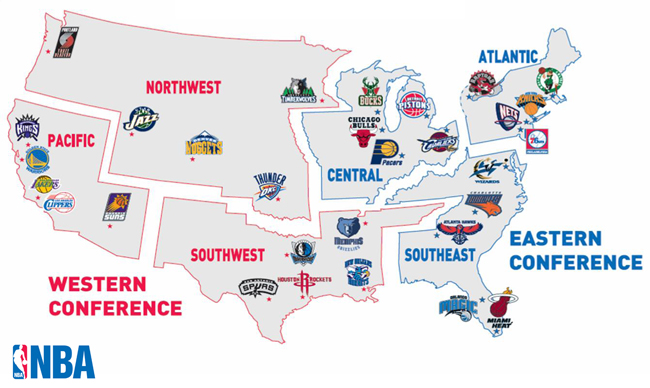

Per poder realitzar aquesta classificació s'ha creat un diccionari que conté com a clau el nom de la divisió i com a valor associat el nom de els equips que hi pertanyen.

Divisions={'Atlantic Division':['Toronto Raptors', 'Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 'New York Knicks'],'Central Division':['Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls','Detroit Pistons', 'Cleveland Cavaliers'],'SouthEast Division':['Miami Heat', 'Orlando Magic','Washington Wizards','Charlotte Hornets','Atlanta Hawks'],'NorWest Division':['Denver Nuggets','Utah Jazz','Oklahoma City Thunder','Portland Trail Blazers', 'Minnesota Timberwolves'],'Pacific Division':['Los Angeles Lakers','Los Angeles Clippers','Sacramento Kings','Phoenix Suns','Golden State Warriors'],'SouthWest Division':['Houston Rockets','Dallas Mavericks','Memphis Grizzlies','New Orleans Pelicans','San Antonio Spurs']}

Crearem el diccionari cod que conté una codificació de el 1 al 6 per cada una de les divisions. També una array div_visitor i div_local on guardarem els valors.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Per cada equip guardem el valor associat de la seva divisió a a les arrays div_visitor i div_local i retorna aquestes dues arrays


In [20]:
Divisions={'Atlantic Division':['Toronto Raptors', 'Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 'New York Knicks'],'Central Division':['Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls','Detroit Pistons', 'Cleveland Cavaliers'],'SouthEast Division':['Miami Heat', 'Orlando Magic','Washington Wizards','Charlotte Hornets','Atlanta Hawks'],'NorWest Division':['Denver Nuggets','Utah Jazz','Oklahoma City Thunder','Portland Trail Blazers', 'Minnesota Timberwolves'],'Pacific Division':['Los Angeles Lakers','Los Angeles Clippers','Sacramento Kings','Phoenix Suns','Golden State Warriors'],'SouthWest Division':['Houston Rockets','Dallas Mavericks','Memphis Grizzlies','New Orleans Pelicans','San Antonio Spurs']}

def conf_div(data,dim):
    cod={'Atlantic Division':1,'Central Division':2,'SouthEast Division':3,'NorWest Division':4,'Pacific Division':5,'SouthWest Division':6}
    div_visitor=[]
    div_local=[]
    for i in range (dim):
        for key in Divisions:
            if data['Visitor'][i] in Divisions[key]:
                div_visitor=np.append(div_visitor,cod[key])
            if data['Home'][i] in Divisions[key]:
                div_local=np.append(div_local,cod[key])

    return div_visitor,div_local


div_v,div_l=conf_div(data,len(data))
#print((div_v))
#print((div_l))

data['Divisions Visitor']=div_v
data['Divisions Home']=div_l
data

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,Divisions Visitor,Divisions Home
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,6.0,1.0
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,5.0,5.0
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,2.0,3.0
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,2.0,2.0
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,1.0,5.0
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,2.0,1.0
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,1.0,3.0
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,3.0,3.0


#### Volem classificar els equips en funció de si juguen a la conferència Est o Oest

La següent funció ens permetrà extreure un paràmetre que inidicarà si cada un dels equips juga a la conferència Est o Oest.


Primer de tot cal inidicar què són les conferències. La NBA està divida en dos conferències formades per 15 equips cada una, per tant hi ha 2 conferències de 15 equips cada una. Aquestes conferències es fan per proximitat geogràfica ja que Estats Units és un país enorme. Per evitar fer tants viatges llargs els equips de cada conferència juguen més partits entre ells que amb els altres equips de la lliga. Cada equip juga 4 partits contra  els de la mateixa conferència i 2 contra els de la altre conferència.

En la següent imatge es pot veure clarament com funcionen les conferències, la conferència Est engloba tots els equips propers a la costa Est dels Estats Units i la conferència Oest engloba els equips de la costa Oest i del centre del país com es pot veure a la següent imatge.

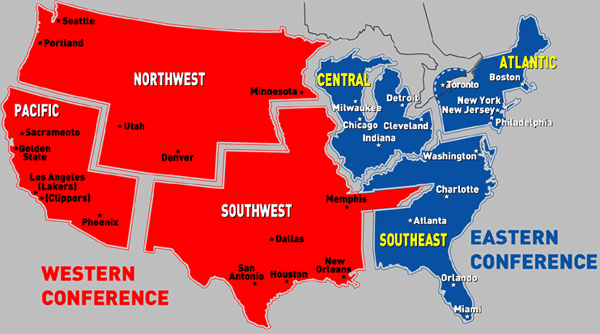



Per poder realitzar aquesta classificació s'ha creat un diccionari que conté com a clau el nom de la conferència i com a valor associat el nom de els equips que hi pertanyen.

Conferences={'Eastern Conference':['Toronto Raptors', 'Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 'New York Knicks','Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls','Detroit Pistons', 'Cleveland Cavaliers','Miami Heat', 'Orlando Magic','Washington Wizards','Charlotte Hornets','Atlanta Hawks'],'Western Conference':['Denver Nuggets','Utah Jazz','Oklahoma City Thunder','Portland Trail Blazers', 'Minnesota Timberwolves','Los Angeles Lakers','Los Angeles Clippers','Sacramento Kings','Phoenix Suns','Golden State Warriors','Houston Rockets','Dallas Mavericks','Memphis Grizzlies','New Orleans Pelicans','San Antonio Spurs']}



Crearem el diccionari codi que conté una codificació de 0 o 1 per cada una de les conferències (conferència Oest =1 i conferència Est=0). També una array conf_visitor i conf_local on guardarem els valors.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Per cada equip guardem el valor associat de la seva conferència a les arrays div_visitor i div_local i retorna aquestes dues arrays


Finalment restem les dues arrays per tal de obtenir un tercer array que ens doni la diferencia entre les conferències dels dos equips que disputen el partit, si el resultat de la resta és 0 voldrà dir que són de la mateixa conferència si la resta dóna com a resultat +1 o -1 voldrà dir que són de conferències diferents.

In [21]:
Conferences={'Eastern Conference':['Toronto Raptors', 'Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 'New York Knicks','Milwaukee Bucks', 'Indiana Pacers', 'Chicago Bulls','Detroit Pistons', 'Cleveland Cavaliers','Miami Heat', 'Orlando Magic','Washington Wizards','Charlotte Hornets','Atlanta Hawks'],'Western Conference':['Denver Nuggets','Utah Jazz','Oklahoma City Thunder','Portland Trail Blazers', 'Minnesota Timberwolves','Los Angeles Lakers','Los Angeles Clippers','Sacramento Kings','Phoenix Suns','Golden State Warriors','Houston Rockets','Dallas Mavericks','Memphis Grizzlies','New Orleans Pelicans','San Antonio Spurs']}

def conf(data,dim):
    codi={'Western Conference':1,'Eastern Conference':0}
    conf_visitor=[]
    conf_local=[]
    for i in range (dim):
        for key in Conferences:
            if data['Visitor'][i] in Conferences[key]:
                conf_visitor=np.append(conf_visitor,codi[key])
            if data['Home'][i] in Conferences[key]:
                conf_local=np.append(conf_local,codi[key])

    return conf_visitor,conf_local


conf_v,conf_l=conf(data,len(data))
#print((conf_v))
#print((conf_l))
conf=[]
for i in range(len(conf_v)):
    conf=np.append(conf,"{0:.2f}".format(float(conf_l[i])-float(conf_v[i])))

data['Conference Visitor']=conf_v
data['Conference Home']=conf_l
data['Conference']=conf
data

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,Divisions Visitor,Divisions Home,Conference Visitor,Conference Home,Conference
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,6.0,1.0,1.0,0.0,-1.00
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,5.0,5.0,1.0,1.0,0.00
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,2.0,3.0,0.0,0.0,0.00
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,2.0,2.0,0.0,0.0,0.00
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,2.0,3.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,1.0,5.0,0.0,1.0,1.00
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,2.0,1.0,0.0,0.0,0.00
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,1.0,3.0,0.0,0.0,0.00
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,3.0,3.0,0.0,0.0,0.00


#### Percentatge de victòries en els últims N partits (%W)

La següent funció ens permetrà extreure el % de victòries en els últims N partits de l'equip local i l'equip visitant just abans de començar el partit en questió.

A diferència de les dues altres dades que utilitzen el percentatge de victòries aquesta funció només calcula el percentatge en els últims N partits. Per exemple en el cas que N=10 només tindrem en compte els resultats dels últims 10 partits de cada equip.

El motiu de buscar aquest paràmetre és que permet tenir en compte el moment de forma de cada equip en els últims partits. Ja que si un equip per exemple guanya molts partits al principi de temporada i llavors en perd molts el percentatge de victòries pot resultar enganyós per l'estat de forma actual de l'equip.

Per tal de obtenir aquest percentatge de victòries en els últims N partits haurem de crear els següent diccionari anomenat last_N_games.
També crearem dos arrays buits on emmagtzamarem els percentatges de victòries actualitzats i els afegirem al dataframe (last_N_games_visitor, last_N_games_home).

Aquest diccionari contindrà com a clau el nom de l'equip de l'NBA en questió i com a valor associat a la clau  una llista amb N strings que seràn 'L' o 'W' en funció de si l'equip ha guanyat o perdut l'últim partit. Un diccionari per N=10 seria del següent format.

{'Los Angeles Lakers': ['W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L']}

No obstant durant els primers 90 partits de la temporada ulitzarem el percentatge de victòries previst per les Vegas al principi de temporada que hem guardat al diccionari Vegas_pred, d'aquesta manera evitem errors en els primers partits per manca de dades. un cop disputats 90 partits de la temporada cada equip n'haurà disputat com a minim 6 i per tant el percentatge de victories obtingut ja començarà a ser més rellevant (90 partits és un nombre arbitràri que pot ser modificat).

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit. 

2. Inicialitzem el diccionari per cada equip si no ha jugat (fins que tots els equips no hagin jugat el seu primer partit el diccionari no estarà complert), també assignem un valor al primer partit de cada equip en aquest cas posarem una llista buida.

2. Apliquem un if per veure si ha guanyat l'equip local o el visitant i dins d'aquest if un altre per veure si estem dins dels primers 90 partits o no. 

3. En cas que estiguem dins dels 90 primers partits calcularem el percentatge de victòries a partir de la predicció de las Vegas i llavors guardarem el resultat del partit com a 'W' o 'L' si l'equip en questió ha guanyat o perdut.

4. En cas que ja s'hagin disputat els primers 90 partits de la temporada, utilitzarem els valors de la llista corresponent a cada equip en què contarem les vegades que hi apareix la string 'W' dividit per la llargada de la llista. Amb això obtindrem el percentatge.

5. Finalment un cop la llista de resultats de cada equip arrivi a la llargada N establerta per la funció borrarem el primer element de la llista. D'aquesta manera sempre tindrem guardats els resultats dels últims N partits.

6. la funció retornarà el diccionari amb el percentatge de victòries de cada equip en els últims N partits i dos arrays que contenen els percentatges de victòries en els últims N partits dels equips locals i visitants.

Finalment restem els dos arrays per tal de obtenir un tercer array que ens doni la diferencia entre els dos percentatges de victories els últims N partits.



In [22]:
def last_N_game(data,dim,N):
    last_N_games={}
    last_N_visitor=[]
    last_N_local=[]
    for i in range (dim):
        if data['Visitor'][i] not in last_N_games:
            last_N_games[data['Visitor'][i]]=[]

        if data['Home'][i] not in last_N_games:
            last_N_games[data['Home'][i]]=[]

        if int(data['PTSV'][i])>int(data['PTSH'][i]):

            if i<90:

                last_N_visitor=np.append(last_N_visitor, "{0:.2f}".format(float(Vegas_pred[data['Visitor'][i]])/float(82)))
                last_N_local=np.append(last_N_local, "{0:.2f}".format(float(Vegas_pred[data['Home'][i]])/float(82)))
            if i>=90:
                last_N_visitor=np.append(last_N_visitor, "{0:.2f}".format(last_N_games[data['Visitor'][i]].count('W')/len(last_N_games[data['Visitor'][i]])))
                last_N_local=np.append(last_N_local, "{0:.2f}".format(last_N_games[data['Home'][i]].count('W')/len(last_N_games[data['Home'][i]])))
            last_N_games[data['Visitor'][i]]= last_N_games[data['Visitor'][i]]+['W']
            last_N_games[data['Home'][i]]=last_N_games[data['Home'][i]]+['L']
            if len(last_N_games[data['Visitor'][i]])>=N:
                last_N_games[data['Visitor'][i]].pop(0)
                last_N_games[data['Visitor'][i]]=last_N_games[data['Visitor'][i]]
            if len(last_N_games[data['Home'][i]])>=N:
                last_N_games[data['Home'][i]].pop(0)
                last_N_games[data['Home'][i]]=last_N_games[data['Home'][i]]

        else:
            if i<90:

                last_N_visitor=np.append(last_N_visitor, "{0:.2f}".format(float(Vegas_pred[data['Visitor'][i]])/float(82)))
                last_N_local=np.append(last_N_local, "{0:.2f}".format(float(Vegas_pred[data['Home'][i]])/float(82)))
            if i>=90:
                last_N_visitor=np.append(last_N_visitor, "{0:.2f}".format(last_N_games[data['Visitor'][i]].count('W')/len(last_N_games[data['Visitor'][i]])))
                last_N_local=np.append(last_N_local,"{0:.2f}".format( last_N_games[data['Home'][i]].count('W')/len(last_N_games[data['Home'][i]])))


            last_N_games[data['Visitor'][i]]= last_N_games[data['Visitor'][i]]+['L']
            last_N_games[data['Home'][i]]=last_N_games[data['Home'][i]]+['W']

            if len(last_N_games[data['Visitor'][i]])>=N:
                last_N_games[data['Visitor'][i]].pop(0)
                last_N_games[data['Visitor'][i]]=last_N_games[data['Visitor'][i]]
            if len(last_N_games[data['Home'][i]])>=N:
                last_N_games[data['Home'][i]].pop(0)
                last_N_games[data['Home'][i]]=last_N_games[data['Home'][i]]

    
    return last_N_games,last_N_visitor,last_N_local

last_N_g,last_N_v,last_N_l=last_N_game(data,len(data),10)

last_N=[]
for i in range(len(last_N_v)):
    last_N=np.append(last_N,"{0:.2f}".format(float(last_N_l[i])-float(last_N_v[i])))
    
print(last_N_g)
    
data['Last N']=last_N
data


{'New Orleans Pelicans': ['W', 'W', 'L', 'W', 'L', 'L', 'L', 'W', 'W'], 'Toronto Raptors': ['W', 'W', 'L', 'L', 'L', 'W', 'W', 'W', 'W'], 'Los Angeles Lakers': ['W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L'], 'Los Angeles Clippers': ['L', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W'], 'Chicago Bulls': ['L', 'W', 'L', 'L', 'W', 'L', 'L', 'L', 'W'], 'Charlotte Hornets': ['L', 'W', 'W', 'L', 'L', 'L', 'W', 'L', 'W'], 'Detroit Pistons': ['L', 'L', 'L', 'W', 'L', 'L', 'L', 'L', 'L'], 'Indiana Pacers': ['L', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'L'], 'Cleveland Cavaliers': ['W', 'W', 'L', 'L', 'L', 'L', 'W', 'W', 'L'], 'Orlando Magic': ['W', 'W', 'W', 'L', 'L', 'L', 'W', 'W', 'W'], 'Minnesota Timberwolves': ['L', 'W', 'L', 'L', 'W', 'W', 'L', 'L', 'L'], 'Brooklyn Nets': ['L', 'L', 'L', 'L', 'W', 'L', 'W', 'W', 'W'], 'Memphis Grizzlies': ['L', 'L', 'L', 'W', 'W', 'W', 'L', 'W', 'L'], 'Miami Heat': ['L', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'L'], 'Boston Celtics': ['L', 'W', 'W', 'L', 'L', 'W', 'L', 'L', 

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,Divisions Visitor,Divisions Home,Conference Visitor,Conference Home,Conference,Last N
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,6.0,1.0,1.0,0.0,-1.00,0.07
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,5.0,5.0,1.0,1.0,0.00,0.05
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,2.0,3.0,0.0,0.0,0.00,-0.08
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,2.0,2.0,0.0,0.0,0.00,0.13
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,2.0,3.0,0.0,0.0,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,1.0,5.0,0.0,1.0,1.00,0.45
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,2.0,1.0,0.0,0.0,0.00,0.33
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,1.0,3.0,0.0,0.0,0.00,0.11
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,3.0,3.0,0.0,0.0,0.00,0.34


##### Càlcul del Net Rating( diferència de punts anotats a favor i en contra)

La següent funció ens permetrà extreure el paràmetre anomanet Net Rating, aquest paràmetre és el valor que té en compte la diferència entre punts a favor i en contra de cada equip dividit per el nombre de partits totals disputats. Això permet veure si un equip sol guanyar o perdre per molts o pocs punts de diferència.


Per tal de obtenir aquesta diferència mitjana de punts per partit crearem el següent diccionari anomenat net_rat={}.
També crearem dos arrays buits on emmagtzamarem el net rating tant per l'equip local com per l'equip visitant (net_rat_visitor, net_rat_local).

El diccionari tindrà com a clau el nom de l'equip de l'NBA en questió i com a valor associat a la clau una llista de dos valors el primer contindrà la resta de punts a favor menys punts en contra, el segon valor serà el nombre de partits disputats, a continució en veiem un exemple:

{New York Knicks': [-417, 66]}


La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Inicialitzem el diccionari per cada equip si no ha jugat utilitzant una llista del següent format [0,1] (fins que tots els equips no hagin jugat el seu primer partit el diccionari no estarà complert).

3. Un cop inicilitzats tots els diccionaris creem una variable, anomenada dif que conté la diferència de punts del partit analitzat, tot seguit calcularem el net rating i el guardarem a les arrays. 

4. Finalment actualitzarem els valors de la llista del diccionari per cada equip. Tant de la diferència de punts com la de partits disputats.

5. La funció retorna el valor de les dues arrays i també el diccionari que conté els valors necessaris per calcular el net rating.

Finalment restem les dues arrays per tal de obtenir un tercer array que ens doni la diferencia entre el net rating  dels dos equips.

In [23]:
def net_rating(data,dim):
    net_rat={}
    net_rat_visitor=[]
    net_rat_local=[]
    for i in range(dim):
        if data['Visitor'][i] not in net_rat:
            net_rat[data['Visitor'][i]]=[0,1]
            net_rat_visitor=np.append(net_rat_visitor,"{0:.2f}".format(0.0))
        if data['Home'][i] not in net_rat:
            net_rat[data['Home'][i]]=[0,1]   
            net_rat_local=np.append(net_rat_local, "{0:.2f}".format(0.0))
        else:
            dif=int(data['PTSV'][i])-int(data['PTSH'][i])

            net_rat_visitor=np.append(net_rat_visitor,"{0:.2f}".format(int(net_rat[data['Visitor'][i]][0])/int(net_rat[data['Visitor'][i]][1])))
            net_rat_local=np.append(net_rat_local,"{0:.2f}".format(int(net_rat[data['Home'][i]][0])/int(net_rat[data['Home'][i]][1])))
            if dif<0:
                dif=dif*-1
            if int(data['PTSV'][i])>int(data['PTSH'][i]):
                net_rat[data['Visitor'][i]][0]=net_rat[data['Visitor'][i]][0]+dif
                net_rat[data['Visitor'][i]][1]=net_rat[data['Visitor'][i]][1]+1
                net_rat[data['Home'][i]][0]=net_rat[data['Home'][i]][0]+(dif*-1)
                net_rat[data['Home'][i]][1]=net_rat[data['Home'][i]][1]+1
            if int(data['PTSV'][i])<int(data['PTSH'][i]):
                net_rat[data['Visitor'][i]][0]=net_rat[data['Visitor'][i]][0]+(dif*-1)
                net_rat[data['Visitor'][i]][1]=net_rat[data['Visitor'][i]][1]+1
                net_rat[data['Home'][i]][0]=net_rat[data['Home'][i]][0]+dif
                net_rat[data['Home'][i]][1]=net_rat[data['Home'][i]][1]+1

    return net_rat,net_rat_visitor,net_rat_local

net_rating,net_rating_visitor,net_rating_local=net_rating(data,len(data))

print(net_rating)

net_rating=[]
for i in range(len(net_rating_local)):
    net_rating=np.append(net_rating,"{0:.3f}".format(float(net_rating_local[i])-float(net_rating_visitor[i])))


data['Net Rating']=net_rating
data

{'New Orleans Pelicans': [-45, 64], 'Toronto Raptors': [405, 64], 'Los Angeles Lakers': [477, 63], 'Los Angeles Clippers': [388, 63], 'Chicago Bulls': [-199, 65], 'Charlotte Hornets': [-440, 65], 'Detroit Pistons': [-244, 66], 'Indiana Pacers': [135, 65], 'Cleveland Cavaliers': [-504, 65], 'Orlando Magic': [-72, 65], 'Minnesota Timberwolves': [-276, 64], 'Brooklyn Nets': [-40, 64], 'Memphis Grizzlies': [-51, 65], 'Miami Heat': [191, 65], 'Boston Celtics': [409, 64], 'Philadelphia 76ers': [130, 65], 'Washington Wizards': [-251, 64], 'Dallas Mavericks': [397, 67], 'New York Knicks': [-417, 66], 'San Antonio Spurs': [-120, 63], 'Oklahoma City Thunder': [162, 64], 'Utah Jazz': [198, 64], 'Sacramento Kings': [-94, 64], 'Phoenix Suns': [-118, 65], 'Denver Nuggets': [184, 65], 'Portland Trail Blazers': [-98, 66], 'Atlanta Hawks': [-534, 68], 'Milwaukee Bucks': [728, 65], 'Houston Rockets': [246, 64], 'Golden State Warriors': [-547, 65]}


,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,Divisions Visitor,Divisions Home,Conference Visitor,Conference Home,Conference,Last N,Net Rating
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,6.0,1.0,1.0,0.0,-1.00,0.07,0.000
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,5.0,5.0,1.0,1.0,0.00,0.05,0.000
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,2.0,3.0,0.0,0.0,0.00,-0.08,0.000
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,2.0,2.0,0.0,0.0,0.00,0.13,0.000
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,2.0,3.0,0.0,0.0,0.00,0.20,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,1.0,5.0,0.0,1.0,1.00,0.45,8.400
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,2.0,1.0,0.0,0.0,0.00,0.33,5.230
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,1.0,3.0,0.0,0.0,0.00,0.11,-1.410
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,3.0,3.0,0.0,0.0,0.00,0.34,10.210


#### Càlcul de si s'ha jugat pròrroga a l'últim partit disputat

La següent funció ens permetrà extreure un paràmetre que inidicarà si l'equip en questió ha disputat una pròrroga a l'últim partit o no.

Primer de tot cal inidicar que els partits a la NBA duren 48 minuts i que en cas d'empat les pròrrogues són de 5 minuts extres. En cas de pròrroga això suposa un desgast extra per l'equip en questió que pot afectar al seu rendiment al partit següent.

Per poder obtenir aquest paràmetre s'ha creat un diccionari anomenat overtime que conté com a clau el nom de l'equip i com a valor associat un 0 si no ha disputat pròrroga l'últim parti i un 1 si l'ha disputat.

{'Toronto Raptors': 0, 'New Orleans Pelicans': 0, 'Los Angeles Clippers': 0, 'Los Angeles Lakers': 0, 'Charlotte Hornets': 0, 'Chicago Bulls': 0, 'Indiana Pacers': 0, 'Detroit Pistons': 0, 'Orlando Magic': 0, 'Cleveland Cavaliers': 0, 'Brooklyn Nets': 0, 'Minnesota Timberwolves': 0, 'Miami Heat': 0, 'Memphis Grizzlies': 0, 'Philadelphia 76ers': 0, 'Boston Celtics': 0, 'Dallas Mavericks': 0, 'Washington Wizards': 0, 'San Antonio Spurs': 0, 'New York Knicks': 1, 'Utah Jazz': 0, 'Oklahoma City Thunder': 0, 'Phoenix Suns': 0, 'Sacramento Kings': 0, 'Portland Trail Blazers': 0, 'Denver Nuggets': 0, 'Atlanta Hawks': 1, 'Houston Rockets': 0, 'Milwaukee Bucks': 0, 'Golden State Warriors': 0}

També crearem dues array overtime_visitor i overtime_local on guardarem els valors.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Per cada equip guardem el valor associat de al diccionari i posteriorment modificarem el valor associat en funció de si l'equip ha disputat pròrroga en el partit actual.

3. Finalment la funció retorna el diccionari overtime i les arrays overtime_local i overtime_visitor.


Per acabar restem les dues arrays per tal d'obtenir un tercer array que ens doni la diferència entre els dos equips pel que fa a pròrroga disputada. Si el resultat de la resta és 0 voldrà dir que ambdós equips han jugat pròrroga el partit anterior o cap dels dos l'ha disputat. Si la resta dóna com a resultat +1 o -1 voldrà dir que són un equip ha disputat pròrroga i l'altre no.

In [24]:
def OT_last_match(data,dim):
    overtime={}
    overtime_local=[]
    overtime_visitor=[]
    for i in range (dim):
        if  data['Home'][i] not in overtime:
            overtime[data['Home'][i]]=0
        if  data['Visitor'][i] not in overtime:
            overtime[data['Visitor'][i]]=0
        overtime_local=np.append(overtime_local,overtime[data['Home'][i]])
        overtime_visitor=np.append(overtime_visitor,overtime[data['Visitor'][i]])
        if data['Overtime'][i]==1:
            if overtime[data['Home'][i]]==0:
                overtime[data['Home'][i]]=overtime[data['Home'][i]]+1
            if overtime[data['Visitor'][i]]==0:
                overtime[data['Visitor'][i]]=overtime[data['Visitor'][i]]+1

        if data['Overtime'][i]==0 and overtime[data['Home'][i]]==1:
            overtime[data['Home'][i]]=overtime[data['Home'][i]]-1
        if data['Overtime'][i]==0 and overtime[data['Visitor'][i]]==1:
            overtime[data['Visitor'][i]]=overtime[data['Visitor'][i]]-1

    return(overtime,overtime_local,overtime_visitor)

OTs,OT_local,OT_visit=OT_last_match(data,len(data))
#print(OTs,OT_local,OT_visit)

OT=[]
for i in range(len(OT_local)):
    OT=np.append(OT,"{0:.2f}".format(float(OT_local[i])-float(OT_visit[i])))
print(OTs)
data['OT last match']=OT
data

{'Toronto Raptors': 0, 'New Orleans Pelicans': 0, 'Los Angeles Clippers': 0, 'Los Angeles Lakers': 0, 'Charlotte Hornets': 0, 'Chicago Bulls': 0, 'Indiana Pacers': 0, 'Detroit Pistons': 0, 'Orlando Magic': 0, 'Cleveland Cavaliers': 0, 'Brooklyn Nets': 0, 'Minnesota Timberwolves': 0, 'Miami Heat': 0, 'Memphis Grizzlies': 0, 'Philadelphia 76ers': 0, 'Boston Celtics': 0, 'Dallas Mavericks': 0, 'Washington Wizards': 0, 'San Antonio Spurs': 0, 'New York Knicks': 1, 'Utah Jazz': 0, 'Oklahoma City Thunder': 0, 'Phoenix Suns': 0, 'Sacramento Kings': 0, 'Portland Trail Blazers': 0, 'Denver Nuggets': 0, 'Atlanta Hawks': 1, 'Houston Rockets': 0, 'Milwaukee Bucks': 0, 'Golden State Warriors': 0}


,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,Divisions Visitor,Divisions Home,Conference Visitor,Conference Home,Conference,Last N,Net Rating,OT last match
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,6.0,1.0,1.0,0.0,-1.00,0.07,0.000,0.00
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,5.0,5.0,1.0,1.0,0.00,0.05,0.000,0.00
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,2.0,3.0,0.0,0.0,0.00,-0.08,0.000,0.00
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,2.0,2.0,0.0,0.0,0.00,0.13,0.000,0.00
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,2.0,3.0,0.0,0.0,0.00,0.20,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,1.0,5.0,0.0,1.0,1.00,0.45,8.400,0.00
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,2.0,1.0,0.0,0.0,0.00,0.33,5.230,0.00
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,1.0,3.0,0.0,0.0,0.00,0.11,-1.410,1.00
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,3.0,3.0,0.0,0.0,0.00,0.34,10.210,-1.00


#### Jugadors que són estrelles de la NBA

A la NBA hi ha jugadors que tenen influència important en els partits i que la seva simple presència en el partit o no pot canviar les possibilitats d'un equip de guanyar un partit. Aquests jugadors s'han escollit a partir de una llista els 50 millors jugadors de la lliga que es fa al principi de cada temporada.

Aquesta funció seleccionarà entre el dataframe que conté tots els jugadors que han disputat de la temporada els que tenen un 1 en la columna STAR i els emmagatzema en un diccionari.

Crearem un diccionari anomenat STARS que contindrà com a clau el nom dels jugadors que són considerats entre els 50 millors a l'inici de la temporada i com a valor associat un 1.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un jugador de la NBA. 

2. Guardarem tal com hem explicat els jugadors que són considerats entre els 50 millors.

3. Finalment la funció retorna el diccionari STARS.

In [25]:
team_capitals={'Toronto Raptors':'TOR', 'Boston Celtics':'BOS', 'Philadelphia 76ers':'PHI', 'Brooklyn Nets':'BRK', 'New York Knicks':'NYK','Milwaukee Bucks':'MIL', 'Indiana Pacers':'IND', 'Chicago Bulls':'CHI','Detroit Pistons':'DET', 'Cleveland Cavaliers':'CLE','Miami Heat':'MIA', 'Orlando Magic':'ORL','Washington Wizards':'WAS','Charlotte Hornets':'CHO','Atlanta Hawks':'ATL','Denver Nuggets':'DEN','Utah Jazz':'UTA','Oklahoma City Thunder':'OKC','Portland Trail Blazers':'POR', 'Minnesota Timberwolves':'MIN','Los Angeles Lakers':'LAL','Los Angeles Clippers':'LAC','Sacramento Kings':'SAC','Phoenix Suns':'PHO','Golden State Warriors':'GSW','Houston Rockets':'HOU','Dallas Mavericks':'DAL','Memphis Grizzlies':'MEM','New Orleans Pelicans':'NOP','San Antonio Spurs':'SAS'}

def player_stat(data,dim):
    stars={}
    for i in range (dim):
        if data['STAR'][i]==1:
            stars[data['Player'][i]]=data['STAR'][i]
    return stars


stars=player_stat(data_players,len(data_players))
print(stars)

{'James Harden': 1, 'Giannis Antetokounmpo': 1, 'LeBron James': 1, 'Nikola Jokic': 1, 'Anthony Davis': 1, 'Damian Lillard': 1, 'Luka Doncic': 1, 'Kawhi Leonard': 1, 'Jimmy Butler': 1, 'Chris Paul': 1, 'Rudy Gobert': 1, 'Jayson Tatum': 1, 'Ben Simmons': 1, 'Karl-Anthony Towns': 1, 'Khris Middleton': 1, 'Nikola Vucevic': 1, 'Kemba Walker': 1, 'Bradley Beal': 1, 'Kyle Lowry': 1, 'Joel Embiid': 1, 'Danilo Gallinari': 1, 'Devin Booker': 1, 'Jrue Holiday': 1, 'Donovan Mitchell': 1, 'Steven Adams': 1, 'Paul George': 1, 'Al Horford': 1, 'Pascal Siakam': 1, 'DeMar DeRozan': 1, 'Kevin Love': 1, 'Russell Westbrook': 1, 'Eric Bledsoe': 1, 'Kyrie Irving': 1, 'CJ McCollum': 1, 'LaMarcus Aldridge': 1, 'Tobias Harris': 1, 'Andre Drummond': 1, "De'Aaron Fox": 1, 'Jamal Murray': 1, 'Kristaps Porzingis': 1, "D'Angelo Russell": 1, 'Marc Gasol': 1, 'Myles Turner': 1, 'Paul Millsap': 1, 'Mike Conley': 1, 'Draymond Green': 1, 'Stephen Curry': 1, 'Victor Oladipo': 1, 'Gary Harris': 1, 'Blake Griffin': 1}


####  Partits disputats per els jugadors que són estrelles de la NBA

A la NBA hi ha jugadors que tenen influència important en els partits i que la seva simple presència en el partit o no pot canviar les possibilitats d'un equip de guanyar un partit. Per tal de saber quins partits han jugat i quins han sigut baixa realitzarem la següent funció.

Aquesta funció rep com a paràmetre el diccionari creat a la funció anterior. El que farem serà crear un diccionari que contingui com a clau el nom del jugador i com a valor associat una llista amb la data de tots els partits disputats per cada jugador durant la temporada. Aquesta dada la treurem de les estadístiques individuals de cada jugador per cada partit.

Crearem un diccionari anomenat games_players on guardarem les dades mencionades anteriorment.

La funció transcorre de la següent manera:

1. Creem un loop amb for key in dic d'aquesta manera buscarem els partits disputats per cada jugador ja que cada key representa un jugador de la NBA considerat estrella.

2. Es crea un dataframe dins del primer loop amb les estadístiques de cada partit del jugador analitzat.

3. Tot seguit aplicarem un loop amb for i in range amb la len d'aquest dataframe i n'extreurem una llista amb totes les dates dels partits que ha disputat i l'afegirem al diccionari games_players amb el jugador corresponent

3. Finalment la funció retorna el diccionari games_players, es pot veure el diccionari que s'en obté a continuació.

In [26]:
def dic_games_played(dic):
    months={'OCT':'10','NOV':'11','DEC':'12','JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09'}
    games_players={}
    for key in dic:
        games=[]
        players= pd.read_csv("NBA_project/players_19_20/games_"+key+".csv")

        for i in range (len(players)):
            match=players['GAME_DATE'][i]
            match=match.split(',')
            m=match[0].split(' ')
            m=str(m[1])+'/'+str(months[m[0]])+'/'+match[1][3::]
            games=games+[m]
        games_players[key]=games
    return games_players

dic_games_played=dic_games_played(stars)
print(dic_games_played)

{'James Harden': ['10/03/20', '08/03/20', '07/03/20', '05/03/20', '02/03/20', '29/02/20', '26/02/20', '24/02/20', '22/02/20', '20/02/20', '11/02/20', '09/02/20', '07/02/20', '06/02/20', '04/02/20', '02/02/20', '31/01/20', '29/01/20', '24/01/20', '22/01/20', '20/01/20', '18/01/20', '15/01/20', '14/01/20', '11/01/20', '09/01/20', '08/01/20', '03/01/20', '31/12/19', '28/12/19', '25/12/19', '23/12/19', '21/12/19', '19/12/19', '16/12/19', '14/12/19', '13/12/19', '11/12/19', '09/12/19', '07/12/19', '05/12/19', '03/12/19', '30/11/19', '27/11/19', '24/11/19', '22/11/19', '20/11/19', '18/11/19', '16/11/19', '15/11/19', '13/11/19', '11/11/19', '09/11/19', '06/11/19', '04/11/19', '03/11/19', '01/11/19', '30/10/19', '28/10/19', '26/10/19', '24/10/19'], 'Giannis Antetokounmpo': ['06/03/20', '04/03/20', '02/03/20', '01/03/20', '28/02/20', '25/02/20', '24/02/20', '22/02/20', '20/02/20', '08/02/20', '06/02/20', '04/02/20', '02/02/20', '31/01/20', '24/01/20', '20/01/20', '18/01/20', '16/01/20', '14/01/

####  Diccionari que conté els jugadors estrella i el seu equip (incloent traspassos)

Ens cal assignar també cada jugador al equip al que pertany. Amb aquest objectiu volem obtenir un diccionari que tingui com a clau el nom del jugador i com a valor el nom de l'equip on juga.

No obstant a la NBA es poden realitzar fitxatges durant la temporada el que suposa un canvi d'equip. En cas que això es produeixi ho emmagtzamarem amb una llista associada a la clau que contindrà l'equip que pertanyia abans del fitxatge, l'equip pel que ha fitxat i la data en la que s'ha produit el traspàs.

{"D'Angelo Russell": ['MIN', 'GSW', 'FEB 05, 2020']}

Per obtenir aquest diccionari ho farem de la següent manera:

Crearem un diccionari anomenat players_teams on guardarem les dades mencionades anteriorment.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range del dataframe data_players que conté les estadístiques globals de tots els jugadors de la lliga al llarg de la temporada.

2. Si l'abreviatura de l'equip al que pertany al jugador és 'TOT' que significa to other team, consultem les seves estadístiques de cada partit per veure quan es va produir el canvi d'equip i quan veiem el dia aplicant un while en guardem la data a la llista de la forma que hem explicat anteriorment.

3. En cas que el jugador hagi jugat tota la temporada al mateix equip, guardem simplement la abreviatura del nom de l'equip en el que ha jugat.

4. Finalment la funció retorna el diccionari players_teams, es pot veure el diccionari que s'en obté a continuació.





In [27]:
def player_team(data,dim,dic):
    players_teams={}
    for i in range(dim):
        last_team=[]
        if data['Player'][i] in stars and data['Tm'][i] == 'TOT':

            j=0
            players= pd.read_csv("NBA_project/players_19_20/games_"+data['Player'][i]+".csv")
            while j+1 < (len(players)):
                j=j+1
                if players['MATCHUP'][j][:3]!=players['MATCHUP'][j-1][:3]:
                    last_team=last_team+[players['MATCHUP'][j-1][:3],players['MATCHUP'][j][:3],players['GAME_DATE'][j]]

            players_teams[data['Player'][i]]=last_team
            
        
        if data['Player'][i] in stars and data['Tm'][i] not in players_teams and data['Tm'][i] != 'TOT' :
            players_teams[data['Player'][i]]=[data['Tm'][i]]

    return players_teams


play_team=player_team(data_players,len(data_players),dic_games_played)
print(play_team)



{'James Harden': ['HOU'], 'Giannis Antetokounmpo': ['MIL'], 'LeBron James': ['LAL'], 'Nikola Jokic': ['DEN'], 'Anthony Davis': ['LAL'], 'Damian Lillard': ['POR'], 'Luka Doncic': ['DAL'], 'Kawhi Leonard': ['LAC'], 'Jimmy Butler': ['MIA'], 'Chris Paul': ['OKC'], 'Rudy Gobert': ['UTA'], 'Jayson Tatum': ['BOS'], 'Ben Simmons': ['PHI'], 'Karl-Anthony Towns': ['MIN'], 'Khris Middleton': ['MIL'], 'Nikola Vucevic': ['ORL'], 'Kemba Walker': ['BOS'], 'Bradley Beal': ['WAS'], 'Kyle Lowry': ['TOR'], 'Joel Embiid': ['PHI'], 'Danilo Gallinari': ['OKC'], 'Devin Booker': ['PHO'], 'Jrue Holiday': ['NOP'], 'Donovan Mitchell': ['UTA'], 'Steven Adams': ['OKC'], 'Paul George': ['LAC'], 'Al Horford': ['PHI'], 'Pascal Siakam': ['TOR'], 'DeMar DeRozan': ['SAS'], 'Kevin Love': ['CLE'], 'Russell Westbrook': ['HOU'], 'Eric Bledsoe': ['MIL'], 'Kyrie Irving': ['BRK'], 'CJ McCollum': ['POR'], 'LaMarcus Aldridge': ['SAS'], 'Tobias Harris': ['PHI'], 'Andre Drummond': ['CLE', 'DET', 'FEB 05, 2020'], "De'Aaron Fox": ['

#### Funció que decideix si una data és anterior a l'altre

Aquesta funció té una funció molt senzilla, simplement calcula si la data que s'hi introdueix primer (date1) és anterior a la segona que s'introdueix (date2).

Cal destacar que volem convertir la date2 que s'introduirà en el format MES dia, any al format any/mes/dia per tal de poder utilitzar la llibreria datetime. L'objecte date time treballa amb aquest format per tant caldrà adaptar-la com es fa a continuació.

Finalment un cop es les dates en un format correcte la funció retorna un booleà indicant si la data1 és anterior a la data2. Per exemple si date1=2019/10/19 i date2=2019/10/20 la funció ens retornarà un True. Aquesta funció la utilitzarem en la següent funció stars_rest_inj.

In [28]:

def date_before(date1,date2):
    # importing datetime module 
    import datetime
    date1=date1.split('/')
    months={'OCT':'10','NOV':'11','DEC':'12','JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','SEP':'09'} 

    match=date2
    match=match.split(',')
    m=match[0].split(' ')
    m=[int(m[1]),int(months[m[0]])]
    # date in yyyy/mm/dd format 
    if date1[1] in ['10','11','12']:
        year1=2019
    if str(m[1]) in ['10','11','12']:
        year2=2019
    if date1[1] in ['01','02','03','04']:
        year1=2020
    if str(m[1]) in ['1','2','3','4']:
        year2=2020
    d1 = datetime.datetime(year1, int(date1[1]), int(date1[0])) 
    d2 = datetime.datetime(year2, m[1],m[0] ) 
    return d1<d2

##### Paràmetre d'absència de les estrelles de l'equip

La següent funció ens permetrà extreure el paràmetre d'absència de les estrelles dels dos equips que disputen el partit. Totes les funcions anteriors estan orientades a poder obtenir aquest paràmetre. Bàsicament indicarà si algun dels jugadors que pertanyen al top 50 no ha disputat el partit en questió. Això ens servirà per analitzar amb detall l'efecte de les absències dels jugadors considerats estrelles en cada partit.

Per tal d'obtenir aquest paràmetre crearem dos arrays buits on emmagtzamarem les baixes de les estrelles tant per l'equip local com per l'equip visitant (stars_inj_visitor, stars_inj_local).

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Per cada jugador del diccionari que conté  el Top 50 que hem creat anteriorment. Analitzarem si aquest jugador ha estat trespassat o no durant la temporada.

3. En cas que hagi estat trespassat consultarem si la data del partit analitzat és anterior o posterior a la del seu traspàs. D'aquesta manera poder saber en quin equip jugava en la data d'aquell partit. A continuació es mira si el jugador considerat top 50 ha jugat el partit en questió o no i en cas  que així sigui guardarem el paràmetre que definirà la seva absència que serà un 1.

4. En cas que no hagi estat traspassat mirarem directament si el jugador considerat top 50 ha jugat el partit en questió o no i en cas  que així sigui guardarem el paràmetre que definirà la seva absència que serà un 1.

5. A continuació guardem els valors acumulats per cada equip a les arrays creades inicialment i la funció les retorna.

Finalment restem les dues arrays per tal de obtenir un tercer array que ens doni la diferencia entre els paràmetres d'absència dels dos equips.

In [29]:
def stars_rest_inj(data_players,dim_players,players,data,dim,stat):
    stars_inj_local=[]
    stars_inj_visitor=[]
    
    for i in range (dim):
      
        value_local=0
        value_visitor=0
        for key in players:
            
            if len(play_team[key])==3:
                
                if date_before(data['New Date'][i],play_team[key][2]) and data['New Date'][i] not in players[key]and play_team[key][1] == team_capitals[data['Home'][i]]:
                   
                    value_local=value_local+stat[key]
                if date_before(data['New Date'][i],play_team[key][2])==False and data['New Date'][i] not in players[key] and play_team[key][0] == team_capitals[data['Home'][i]]:
                   
                    value_local=value_local+stat[key]

                if date_before(data['New Date'][i],play_team[key][2]) and data['New Date'][i] not in players[key]and play_team[key][1] == team_capitals[data['Visitor'][i]]:
                   
                    value_visitor=value_local+stat[key]
                if date_before(data['New Date'][i],play_team[key][2])==False and data['New Date'][i] not in players[key] and play_team[key][0] == team_capitals[data['Visitor'][i]]:
                 
                    value_visitor=value_local+stat[key]
            else:
                
                if data['New Date'][i] not in players[key] and play_team[key][0] == team_capitals[data['Home'][i]]:
                                   
                    value_local=value_local+stat[key]
                
                if data['New Date'][i] not in players[key] and play_team[key][0] == team_capitals[data['Visitor'][i]]:
                    value_visitor=value_visitor+stat[key]

        stars_inj_local=np.append(stars_inj_local,"{0:.2f}".format(value_local))
        stars_inj_visitor=np.append(stars_inj_visitor,"{0:.2f}".format(value_visitor))


    return stars_inj_local,stars_inj_visitor

stars_inj_loc,stars_inj_visit=stars_rest_inj(data_players,len(data_players),dic_games_played,data,len(data),stars)
stars_inj=[]
for j in range(len(stars_inj_loc)):
    stars_inj=np.append(stars_inj,"{0:.2f}".format(float(stars_inj_loc[j])-float(stars_inj_visit[j])))
data['Rest/Injuries Visitor Stars']=stars_inj_visit
data['Rest/Injuries Home Stars']=stars_inj_loc
data['Rest/Injuries Stars']=stars_inj
data
#print(stars_inj_loc)
#print(stars_inj_visit)

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,...,Divisions Home,Conference Visitor,Conference Home,Conference,Last N,Net Rating,OT last match,Rest/Injuries Visitor Stars,Rest/Injuries Home Stars,Rest/Injuries Stars
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,...,1.0,1.0,0.0,-1.00,0.07,0.000,0.00,0.00,0.00,0.00
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,...,5.0,1.0,1.0,0.00,0.05,0.000,0.00,0.00,1.00,1.00
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,...,3.0,0.0,0.0,0.00,-0.08,0.000,0.00,0.00,0.00,0.00
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,...,2.0,0.0,0.0,0.00,0.13,0.000,0.00,1.00,1.00,0.00
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,...,3.0,0.0,0.0,0.00,0.20,0.000,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,...,5.0,0.0,1.0,1.00,0.45,8.400,0.00,1.00,0.00,-1.00
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,...,1.0,0.0,0.0,0.00,0.33,5.230,0.00,1.00,1.00,0.00
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,...,3.0,0.0,0.0,0.00,0.11,-1.410,1.00,0.00,0.00,0.00
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,...,3.0,0.0,0.0,0.00,0.34,10.210,-1.00,0.00,1.00,1.00


#### Ratxa de N victòries o derrotes

La següent funció ens permetrà extreure la ratxa de victòries en els últims n partits de l'equip local i l'equip visitant just abans de començar el partit en questió.

Aquesta funció calcula la ratxa de partits guanyats o perduts consecutius. Per exemple en el cas que n=10 només tindrem en compte només les ratxes de 10 o més victòries o derrotes. És a dir si un equip ha guanyat 11 partits seguits l'equip rebrà un paràmetre 11 si un equip ha guanyat 4 seguits el valor serà 0 ja que està per sota del llindar fixat per N i si un equip ha perdut 12  consecutius el paràmetres serà -12 amb signe negatiu per indicar que es tracta d'una derrota.

El motiu de buscar aquest paràmetre és que permet tenir en compte el moment de forma de cada equip ja que cal tenir en compte si un equip porta una mala o bona dinàmica en els últims partits. Aquest fet pot tenir una influència important en el resultat i cal tenir-la en compte. Una altre cosa que s'ha de tenir en compte és a partir de quants N partits es considera una ratxa.

Per tal de obtenir aquesta ratxa de victòries haurem de crear els següent diccionari anomenat streak_N_games.
També crearem dos arrays buits on emmagtzamarem els valors de les ratxes i els afegirem al dataframe (streak_N_visitor, streak_N_home).

Aquest diccionari contindrà com a clau el nom de l'equip de l'NBA en questió i com a valor associat a la clau  una llista amb N strings que seràn 'L' o 'W' en funció de si l'equip ha guanyat o perdut. Un diccionari per N=30 seria del següent format.

{'New Orleans Pelicans': ['W', 'L', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'L', 'L', 'W', 'W']

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit. 

2. Inicialitzem el diccionari per cada equip si encara no ha jugat (fins que tots els equips no hagin jugat el seu primer partit el diccionari no estarà complert), també assignem un valor al primer partit de cada equip en aquest cas posarem un 0 ja que necessitem que la llista contingui algun valor.

3. Analitzem el diccionari per local i visitant i per ratxa de victòries i de derrotes. En cada un dels casos apliquem un loop a la llista per contar del últims partits quina és la ratxa amb un contador. En cas que la ratxa superi el llindar n, afegim a les arrays el valor d'aquesta ratxa, en cas contrari i afegirem un 0 . 

4. Un cop contat el valor de la ratxa actualitzem el valor del diccionari amb una 'W' o una 'L' en funció del resultat del partit.

5. La funció retornarà el diccionari amb la ratxa de victòries o derrotes de cada equip més grans o iguals que n i dos arrays que contenen les ratxes de victòries i derrotes dels equips locals i visitants.

Finalment restem els dos arrays per tal de obtenir un tercer array que ens doni la diferencia entre les ratxes de victories i derrotes d'ambdós equips.

In [34]:
def streak(data,dim,N,n):
    streak_N_games={}
    streak_N_visitor=[]
    streak_N_local=[]
    for i in range (dim):

        if data['Visitor'][i] not in streak_N_games:
           streak_N_games[data['Visitor'][i]]=[0]
           streak_N_visitor=np.append(streak_N_visitor, 0)

        if data['Home'][i] not in streak_N_games:
            streak_N_games[data['Home'][i]]=[0]
            streak_N_local=np.append(streak_N_local, 0)
        wins=0
        lost=0
        if streak_N_games[data['Visitor'][i]][-1]=='W':

            for j in range(len(streak_N_games[data['Visitor'][i]])):
                if streak_N_games[data['Visitor'][i]][-j-1]=='W':
                    wins=wins+1
                else:
                    break
            if wins>=n:
                streak_N_visitor=np.append(streak_N_visitor, wins)
            else:
                streak_N_visitor=np.append(streak_N_visitor, 0)

        if streak_N_games[data['Visitor'][i]][-1]=='L':

            for j in range(len(streak_N_games[data['Visitor'][i]])):
                if streak_N_games[data['Visitor'][i]][-j-1]=='L':
                    lost=lost+1
                else:
                    break
            if lost>=n:
                streak_N_visitor=np.append(streak_N_visitor, -lost)
            else:
                streak_N_visitor=np.append(streak_N_visitor, 0)     
        wins=0
        lost=0
        if streak_N_games[data['Home'][i]][-1]=='W':

            for j in range(len(streak_N_games[data['Home'][i]])):
                if streak_N_games[data['Home'][i]][-j-1]=='W':
                    wins=wins+1
                else:
                    break
            if wins>=n:
                streak_N_local=np.append(streak_N_local, wins)
            else:
                streak_N_local=np.append(streak_N_local, 0)

        if streak_N_games[data['Home'][i]][-1]=='L':

            for j in range(len(streak_N_games[data['Home'][i]])):
                if streak_N_games[data['Home'][i]][-j-1]=='L':
                    lost=lost+1
                else:
                    break
            if lost>=n:
                streak_N_local=np.append(streak_N_local, -lost)
            else:
                streak_N_local=np.append(streak_N_local, 0)
        

        if int(data['PTSV'][i])>int(data['PTSH'][i]):
            streak_N_games[data['Visitor'][i]]= streak_N_games[data['Visitor'][i]]+['W']
            streak_N_games[data['Home'][i]]=streak_N_games[data['Home'][i]]+['L']
            if len(streak_N_games[data['Visitor'][i]])>=N:
                streak_N_games[data['Visitor'][i]].pop(0)
                streak_N_games[data['Visitor'][i]]=streak_N_games[data['Visitor'][i]]
            if len(streak_N_games[data['Home'][i]])>=N:
                streak_N_games[data['Home'][i]].pop(0)
                streak_N_games[data['Home'][i]]=streak_N_games[data['Home'][i]]

        else:
            streak_N_games[data['Visitor'][i]]= streak_N_games[data['Visitor'][i]]+['L']
            streak_N_games[data['Home'][i]]=streak_N_games[data['Home'][i]]+['W']

            if len(streak_N_games[data['Visitor'][i]])>=N:
                streak_N_games[data['Visitor'][i]].pop(0)
                streak_N_games[data['Visitor'][i]]=streak_N_games[data['Visitor'][i]]
            if len(streak_N_games[data['Home'][i]])>=N:
                streak_N_games[data['Home'][i]].pop(0)
                streak_N_games[data['Home'][i]]=streak_N_games[data['Home'][i]]

    
    return streak_N_games,streak_N_visitor,streak_N_local

streak_N_g,streak_N_v,streak_N_l=streak(data,len(data),30,8)

print(streak_N_g)
streak_N=[]
for i in range(len(streak_N_l)):
    streak_N=np.append(streak_N,"{0:.2f}".format(float(streak_N_l[i])-float(streak_N_v[i])))

data['Win Streak']=streak_N
data


{'New Orleans Pelicans': ['W', 'L', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'L', 'L', 'W', 'W'], 'Toronto Raptors': ['W', 'L', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'W', 'W', 'W', 'W'], 'Los Angeles Lakers': ['W', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L'], 'Los Angeles Clippers': ['W', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W'], 'Chicago Bulls': ['L', 'L', 'L', 'W', 'L', 'W', 'L', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'W', 'L', 'L', 'W', 'L', 'L', 'L', 'W'], 'Charlotte Hornets': ['W', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'W', 'L', 'L', 'L', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'L', 'L', 'L', 'W', '

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,...,Conference Visitor,Conference Home,Conference,Last N,Net Rating,OT last match,Rest/Injuries Visitor Stars,Rest/Injuries Home Stars,Rest/Injuries Stars,Win Streak
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,...,1.0,0.0,-1.00,0.07,0.000,0.00,0.00,0.00,0.00,0.00
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,...,1.0,1.0,0.00,0.05,0.000,0.00,0.00,1.00,1.00,0.00
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,...,0.0,0.0,0.00,-0.08,0.000,0.00,0.00,0.00,0.00,0.00
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,...,0.0,0.0,0.00,0.13,0.000,0.00,1.00,1.00,0.00,0.00
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,...,0.0,0.0,0.00,0.20,0.000,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,...,0.0,1.0,1.00,0.45,8.400,0.00,1.00,0.00,-1.00,0.00
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,1.00,...,0.0,0.0,0.00,0.33,5.230,0.00,1.00,1.00,0.00,0.00
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,...,0.0,0.0,0.00,0.11,-1.410,1.00,0.00,0.00,0.00,0.00
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,...,0.0,0.0,0.00,0.34,10.210,-1.00,0.00,1.00,1.00,0.00


#### Valor de les apostes de cada partit

La següent funció ens permetrà extreure un valor que inidicarà la quota que es va donar abans de cada partit per ambdós equips.

La quota s'expresa en funció de la retribució en cas d'apostar 1 euro. Per exemple si la quota és 1.27 en cas d'encertar el resultat apostant 1 euro obtindriem 1.27 euros.

Els valors d'aquestes quotes ja s'ha explicat a la fase de obtenció de dades com s'han obtingut.

Crearem dues una array bet_visitor i bet_local on guardarem els valors de les apostes per cada partit.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Per cada partit i equip guardem el valor associat de les apostes a les arrays bet_visitor i bet_local i retorna aquestes dues arrays


Finalment restem les dues arrays per tal de obtenir un tercer array que ens doni la diferencia entre les apostes dels dos equips que disputen el partit.


In [25]:
def bets(data_bets,dim_bets,data):
    bet_visitor=[]
    bet_local=[]
    for i in range(len(data)):
       
        for j in range (dim_bets):
            
            if data['New Date'][i] in data_bets['NEW DATE'][j] and data['Home'][i] in data_bets['HOME'][j] and data['Visitor'][i] in data_bets['VISITOR'][j]:
                #print(i,s)
              
                bet_visitor=np.append(bet_visitor,"{0:.2f}".format(data_bets['BET VISITOR'][j]))
                bet_local=np.append(bet_local,"{0:.2f}".format(data_bets['BET HOME'][j]))
                break


    return bet_visitor,bet_local

bet_v,bet_l=bets(data_bets,len(data_bets),data)

data['Bet Visitor']=bet_v
data['Bet Home']=bet_l
bets=[]
for i in range(len(bet_v)):
    bets=np.append(bets,"{0:.2f}".format(float(bet_l[i])-float(bet_v[i])))

data['Bets']=bets
data


,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,...,Last N,Net Rating,OT last match,Rest/Injuries Visitor Stars,Rest/Injuries Home Stars,Rest/Injuries Stars,Win Streak,Bet Visitor,Bet Home,Bets
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,...,0.07,0.000,0.00,0.00,0.00,0.00,0.00,3.28,1.36,-1.92
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,...,0.05,0.000,0.00,0.00,1.00,1.00,0.00,1.61,2.39,0.78
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,...,-0.08,0.000,0.00,0.00,0.00,0.00,0.00,1.62,2.39,0.77
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,...,0.13,0.000,0.00,1.00,1.00,0.00,0.00,3.45,1.33,-2.12
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,...,0.20,0.000,0.00,0.00,0.00,0.00,0.00,4.91,1.20,-3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,...,0.45,8.400,0.00,1.00,0.00,-1.00,0.00,6.73,1.12,-5.61
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,-3.00,...,0.33,5.230,0.00,1.00,1.00,0.00,0.00,6.82,1.12,-5.70
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,...,0.11,-1.410,1.00,0.00,0.00,0.00,0.00,2.72,1.48,-1.24
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,...,0.34,10.210,-1.00,0.00,1.00,1.00,0.00,5.88,1.15,-4.73


#### Distància recorreguda per cada equip

Aquesta funció té com a objectiu calcular la distància en Km recorreguda per cada equip anteriorment al partit analitzat. D'aquesta manera som capaços de monitoritzar quin dels dos equips ha recorregut menys Km i per tant arriva menys fatigat al partit. Pot ser un factor rellevant i tenir un efecte similar al de la funció del Back to Back que hem fet anteriorment. 

Cal destacar que Estats Units és un país enorme amb grans distàncies entre les ciutats on es disputen els partits per exemple la distància entre Los Àngeles i Boston és de 4800 km. Per tant al disputar tants partits en pocs dies els equips passen una part important del seu temps de descans a l'avió. Per tots aquests motius s'ha realitzat la funció següent.

Crearem 3 diccionaris un es dirà travels i contindrà les distàncies que ja hem obtingut anteriorment al Dataframe de distàncies entre ciutats. La clau serà la ciutat origen i la ciutat destí i el valor associat un float que contindrà la distància en Km. El diccionari last_match guardarà la ciutat on s'hagi disputat l'últim partit per cada equip i el diccionari kilometers guardarà les distàncies acumulades totals per cada equip. També crearem com sempre dos arrays per guardar els km de l'equip local i visitant

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit. 

2. Inicialitzem els diccionaris kilometers i last_match amb els primers partits de cada equip i en el cas de l'equip guardarem la distància entre la seva ciutat i la ciutat on han disputat el partit en km. En canvi per els equips que juguen a casa guardarem lògicament un 0.

3. Un cop inicialitzats els diccionaris procedim a buscar per cada partit la distància acumulada per l'equip local i visitant en l'últim desplaçament i l'afegim al diccionari kilometers i last_match. Finalment guardem aquest valor actulitzat a les arrays corresponents. Cal dir que lògicament si un equip juga 2 o més partits a casa la distància nova serà 0 ja que a last match tindrà guardat el nom de la seva ciutat i quan es busqui la distància entre les dues ciutats al ser la mateixa el diccionari travels contindrà un 0.

Finalment restem els dos arrays per tal de obtenir un tercer array que ens doni la diferencia entre les distàncies recorregudes per ambdós equips.

In [26]:
def traveling(data,dim,data_distance,dim_distance):
    travels={}
    for i in range(dim_distance):
        travels[str(data_distance['City Origin'][i])+' - '+str(data_distance['City Destiny'][i])]=data_distance['Distance (Km)'][i]
   
    kilometers={}
    last_match={}
    km_local=[]
    km_visitor=[]
    for i in range(dim):

        if data['Home'][i] not in kilometers:
            kilometers[data['Home'][i]]=0
            km_local=np.append(km_local,"{0:.2f}".format(float(kilometers[data['Home'][i]])))
        if data['Home'][i] not in last_match:
            last_match[data['Home'][i]]=data['Home'][i]
        if data['Visitor'][i] not in kilometers:
            kilometers[data['Visitor'][i]]=float(travels[str(data['Home'][i])+' - '+str(data['Visitor'][i])])
        if data['Visitor'][i] not in last_match:
            last_match[data['Visitor'][i]]=data['Home'][i]
            km_visitor=np.append(km_visitor,"{0:.2f}".format(float(kilometers[data['Visitor'][i]])))


        else:
            if  last_match[data['Home'][i]]==data['Home'][i]:
                kilometers[data['Visitor'][i]]=kilometers[data['Visitor'][i]]+float(travels[str(data['Home'][i])+' - '+str(last_match[data['Visitor'][i]])])
                kilometers[data['Home'][i]]=kilometers[data['Home'][i]]*0.5
                last_match[data['Visitor'][i]]=data['Home'][i]
                last_match[data['Home'][i]]=data['Home'][i]
                km_local=np.append(km_local,"{0:.2f}".format(float(kilometers[data['Home'][i]])))
                km_visitor=np.append(km_visitor,"{0:.2f}".format(float(kilometers[data['Visitor'][i]])))
            else:
                kilometers[data['Visitor'][i]]=kilometers[data['Visitor'][i]]+float(travels[str(data['Home'][i])+' - '+str(last_match[data['Visitor'][i]])])
                kilometers[data['Home'][i]]=kilometers[data['Home'][i]]+float(travels[str(data['Home'][i])+' - '+str(last_match[data['Home'][i]])])
                last_match[data['Visitor'][i]]=data['Home'][i]
                last_match[data['Home'][i]]=data['Home'][i]
                km_local=np.append(km_local,"{0:.2f}".format(float(kilometers[data['Home'][i]])))
                km_visitor=np.append(km_visitor,"{0:.2f}".format(float(kilometers[data['Visitor'][i]])))
       



    return km_local,km_visitor,last_match,kilometers


km_l,km_visit,last_m,kilo=traveling(data,len(data),data_distance,len(data_distance))

km=[]
for i in range(len(km_l)):
    km=np.append(km,"{0:.2f}".format(float(km_l[i])-float(km_visit[i])))

data['Km']=km
data


,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,...,Net Rating,OT last match,Rest/Injuries Visitor Stars,Rest/Injuries Home Stars,Rest/Injuries Stars,Win Streak,Bet Visitor,Bet Home,Bets,Km
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,...,0.000,0.00,0.00,0.00,0.00,0.00,3.28,1.36,-1.92,-1789.00
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,...,0.000,0.00,0.00,1.00,1.00,0.00,1.61,2.39,0.78,0.00
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,...,0.000,0.00,0.00,0.00,0.00,0.00,1.62,2.39,0.77,-947.10
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,...,0.000,0.00,1.00,1.00,0.00,0.00,3.45,1.33,-2.12,-403.40
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,...,0.000,0.00,0.00,0.00,0.00,0.00,4.91,1.20,-3.71,-1436.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,...,8.400,0.00,1.00,0.00,-1.00,0.00,6.73,1.12,-5.61,-1688.56
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,-3.00,...,5.230,0.00,1.00,1.00,0.00,0.00,6.82,1.12,-5.70,4296.74
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,...,-1.410,1.00,0.00,0.00,0.00,0.00,2.72,1.48,-1.24,229.58
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,...,10.210,-1.00,0.00,1.00,1.00,0.00,5.88,1.15,-4.73,1506.34


#### Paràmetre que indica l'equip guanyador de cada partit

Aquesta funció ens retorna el paràmetre que indicarà si el partit l'ha guanyat l'equip local que es retornarà un 1 i si guanya l'equip visitant un 0.

Crearem una array 'winner' on guardarem els valors del guanyador de cada partit.

La funció transcorre de la següent manera:

1. Creem un loop amb for i in range( ) de la longitud del dataframe data d'aquesta manera analitzem cada fila que representa un partit de la temporada. 

2. Per cada partit i equip guardem el valor associat, 1 si guanya l'equip local i 0 si guanya l'equip visitant.

In [27]:
def winner(data,dim):
    winner=[]
    for i in range(dim):
        if int(data['PTSV'][i])>int(data['PTSH'][i]):
            winner=np.append(winner,0)
        else:
            winner=np.append(winner,1)
    return winner

win=winner(data,len(data))
#print(len(win))

data['Winner']=win
data

,Visitor,PTSV,Home,PTSH,Overtime,Attend.,New Date,%W,%W as Home/Visitor,Back to back,...,OT last match,Rest/Injuries Visitor Stars,Rest/Injuries Home Stars,Rest/Injuries Stars,Win Streak,Bet Visitor,Bet Home,Bets,Km,Winner
0,New Orleans Pelicans,122,Toronto Raptors,130,1,"20,787",22/10/19,0.073,0.176,0.00,...,0.00,0.00,0.00,0.00,0.00,3.28,1.36,-1.92,-1789.00,1.0
1,Los Angeles Lakers,102,Los Angeles Clippers,112,0,"19,068",22/10/19,0.049,0.180,0.00,...,0.00,0.00,1.00,1.00,0.00,1.61,2.39,0.78,0.00,1.0
2,Chicago Bulls,125,Charlotte Hornets,126,0,"15,424",23/10/19,-0.079,-0.013,0.00,...,0.00,0.00,0.00,0.00,0.00,1.62,2.39,0.77,-947.10,1.0
3,Detroit Pistons,119,Indiana Pacers,110,0,"17,923",23/10/19,0.134,0.239,0.00,...,0.00,1.00,1.00,0.00,0.00,3.45,1.33,-2.12,-403.40,0.0
4,Cleveland Cavaliers,85,Orlando Magic,94,0,"18,846",23/10/19,0.201,0.280,0.00,...,0.00,0.00,0.00,0.00,0.00,4.91,1.20,-3.71,-1436.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Brooklyn Nets,104,Los Angeles Lakers,102,0,"18,997",10/03/20,0.330,0.412,0.00,...,0.00,1.00,0.00,-1.00,0.00,6.73,1.12,-5.61,-1688.56,0.0
967,Detroit Pistons,106,Philadelphia 76ers,124,0,"20,172",11/03/20,0.286,0.652,-3.00,...,0.00,1.00,1.00,0.00,0.00,6.82,1.12,-5.70,4296.74,1.0
968,New York Knicks,136,Atlanta Hawks,131,1,"15,393",11/03/20,-0.005,0.143,1.00,...,1.00,0.00,0.00,0.00,0.00,2.72,1.48,-1.24,229.58,0.0
969,Charlotte Hornets,109,Miami Heat,98,0,"19,6",11/03/20,0.297,0.507,1.00,...,-1.00,0.00,1.00,1.00,0.00,5.88,1.15,-4.73,1506.34,0.0


In [28]:
# Guardem a un fitxer .csv totes les dades processades per anar a la fase següent de anàlisi.
data.to_csv('NBA_analysis_19_20.csv', index=False)